# **Business Problem**

Brain tumor is one of the deadliest forms of cancer and as all cancer
types, early detection is very important and can save lives.

A growing interest has been seen in deep learningbased semantic segmentation. UNet, which is one of deep learning networks with an encoder-decoder architecture, is widely used in medical image segmentation.

Combining multi-scale features is one of important factors for accurate segmentation.

There are three types of brain tumors menigioma, pituitray and glioma.
the type of the tumor can be an indication of the tumor‘s aggressiveness.

Radiation treatment for brain tumors  where high-energy radiation
source like gamma rays or x-rays shoots in a very precise way at the tumor and
therefore kill the tumor‘s cells while sparing surrounding tissues.

Doctors need to segment the infected tissues by separate the infected cells from the healthy ones. Creating this segmentation map in an accurate way is very tedious, expensive, time-consuming and error-prone task.

**Solution:** 

Use deep learning to help doctors in the segmention process by dveloping an automatic and prcise machine learning model for brain tumor segmentation.






# **Mount Colab to Drive**

In [ ]:
from google.colab import drive
drive.mount('/content/drive/')



Mounted at /content/drive/


In [ ]:
pip install hdf5storage

     |████████████████████████████████| 61kB 5.9MB/s 


# **Import Libaries**

In [ ]:
import warnings
# warnings.filterwarnings('ignore')

import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
plt.style.use("seaborn-darkgrid")
import argparse
from argparse import ArgumentParser
import os
import sys
import numpy as np
import cv2
import warnings
warnings.filterwarnings('ignore')
import random
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
plt.style.use("seaborn-darkgrid")

from sklearn.model_selection import train_test_split

import torch
import torch.nn as nn
import torch.nn.functional as F
from torch.utils.data import Dataset, DataLoader
from torchvision.models import resnext50_32x4d
from torch.optim import Adam, AdamW, lr_scheduler

from tqdm import trange
import os
import albumentations as albu
import cv2
import glob

import torch
import torch.nn as nn
import torch.nn.functional as F
from torch.utils.data import Dataset, DataLoader
from torchvision.models import resnext50_32x4d
from torch.optim import Adam, AdamW, lr_scheduler
import numpy as np
from tqdm import trange
import os
import albumentations as albu
import cv2
import glob
from PIL import Image
import torch
import matplotlib.pyplot as plt
from torchvision.transforms import transforms
from torch.utils.data import DataLoader
import torch
from torchvision.transforms import transforms
import os
import random
from glob import glob
import warnings
import pickle
warnings.filterwarnings('ignore')

import torch
import torch.optim as optim
from torch.utils.data import Dataset, SubsetRandomSampler
import torchvision.transforms as transforms
import torchvision.transforms.functional as TF

from time import time

import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

from PIL import Image

import os
import random
from glob import glob
import warnings
import pickle
warnings.filterwarnings('ignore')



In [ ]:
torch.cuda.empty_cache()

# **Plot Function for Model Loss and Accuracy**

Sørensen–Dice coefficient loss to calculate
the mean loss over a batch of data.This loss mainly
calculates the similarity between two samples.

In [ ]:
import math
import itertools

import numpy as np
import matplotlib.pyplot as plt



def tensors_as_images(tensors, nrows=1, figsize=(8, 8), titles=[],
                      wspace=0.1, hspace=0.2, cmap=None):
    """
    Plots a sequence of pytorch tensors as images.
    :param tensors: A sequence of pytorch tensors, should have shape CxWxH
    """
    assert nrows > 0

    num_tensors = len(tensors)

    ncols = math.ceil(num_tensors / nrows)

    fig, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=figsize,
                             gridspec_kw=dict(wspace=wspace, hspace=hspace),
                             subplot_kw=dict(yticks=[], xticks=[]))
    axes_flat = axes.reshape(-1)

    # Plot each tensor
    for i in range(num_tensors):
        ax = axes_flat[i]

        image_tensor = tensors[i]
        assert image_tensor.dim() == 3  # Make sure shape is CxWxH

        image = image_tensor.numpy()
        image = image.transpose(1, 2, 0)
        image = image.squeeze()  # remove singleton dimensions if any exist

        # Scale to range 0..1
        min, max = np.min(image), np.max(image)
        image = (image-min) / (max-min)

        ax.imshow(image, cmap=cmap)

        if len(titles) > i and titles[i] is not None:
            ax.set_title(titles[i])

    # If there are more axes than tensors, remove their frames
    for j in range(num_tensors, len(axes_flat)):
        axes_flat[j].axis('off')

    return fig, axes


def dataset_first_n(dataset, n, show_classes=False, class_labels=None,
                    random_start=True, **kw):
    """
    Plots first n images of a dataset containing tensor images.
    """

    if random_start:
        start = np.random.randint(0, len(dataset) - n)
        stop = start + n
    else:
        start = 0
        stop = n

    # [(img0, cls0), ..., # (imgN, clsN)]
    first_n = list(itertools.islice(dataset, start, stop))

    # Split (image, class) tuples
    first_n_images, first_n_classes = zip(*first_n)

    if show_classes:
        titles = first_n_classes
        if class_labels:
            titles = [class_labels[cls] for cls in first_n_classes]
    else:
        titles = []

    return tensors_as_images(first_n_images, titles=titles, **kw)


def plot_fit(fit_res: FitResult, fig=None, log_loss=False, legend=None):
    """
    Plots a FitResult object.
    Creates four plots: train loss, test loss, train acc, test acc.
    :param fit_res: The fit result to plot.
    :param fig: A figure previously returned from this function. If not None,
        plots will the added to this figure.
    :param log_loss: Whether to plot the losses in log scale.
    :param legend: What to call this FitResult in the legend.
    :return: The figure.
    """
    if fig is None:
        fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(16, 10),
                                 sharex='col', sharey=False)
        axes = axes.reshape(-1)
    else:
        axes = fig.axes

    for ax in axes:
        for line in ax.lines:
            if line.get_label() == legend:
                line.remove()

    p = itertools.product(['train', 'test'], ['loss', 'acc'])
    for idx, (traintest, lossacc) in enumerate(p):
        ax = axes[idx]
        attr = f'{traintest}_{lossacc}'
        data = getattr(fit_res, attr)
        h = ax.plot(np.arange(1, len(data) + 1), data, label=legend)
        ax.set_title(attr)
        if lossacc == 'loss':
            ax.set_xlabel('Iteration #')
            ax.set_ylabel('Loss')
            if log_loss:
                ax.set_yscale('log')
                ax.set_ylabel('Loss (log)')
        else:
            ax.set_xlabel('Epoch #')
            ax.set_ylabel('Accuracy (%)')
        if legend:
            ax.legend()

    return fig, axes

# **Class Dataset 1**

Get the data item from different classes and attributes

In [ ]:
from torch.utils.data import Dataset
from torchvision.transforms import ToPILImage
import os
import math
import hdf5storage
from enum import Enum


class ClassesLabels(Enum):
    Meningioma = 1
    Glioma = 2
    Pituitary = 3

    def __len__(self):
        return 3


class BrainTumorDataset(Dataset):
    """
        This brain tumor dataset containing 3064 T1-weighted contrast-inhanced images
        from 233 patients with three kinds of brain tumor: meningioma (708 slices),
        glioma (1426 slices), and pituitary tumor (930 slices). Due to the file size
        limit of repository, we split the whole dataset into 4 subsets, and achive
        them in 4 .zip files with each .zip file containing 766 slices.The 5-fold
        cross-validation indices are also provided.
        -----
            This data is organized in matlab data format (.mat file). Each file stores a struct
            containing the following fields for an image:
            label: 1 for meningioma, 2 for glioma, 3 for pituitary tumor
            PID: patient ID
            image: image data
            tumorBorder: a vector storing the coordinates of discrete points on tumor border.
                    For example, [x1, y1, x2, y2,...] in which x1, y1 are planar coordinates on tumor border.
                    It was generated by manually delineating the tumor border. So we can use it to generate
                    binary image of tumor mask.
            tumorMask: a binary image with 1s indicating tumor region
        -----
        taken from https://figshare.com/articles/brain_tumor_dataset/1512427 all right reserved to
            Jun Cheng
            School of Biomedical Engineering
            Southern Medical University, Guangzhou, China
            Email: chengjun583@qq.com
        -----
    """

    def __init__(self, root, train=True, download=True,
                                                  classes=(ClassesLabels.Meningioma,
                                                  ClassesLabels.Glioma,
                                                  ClassesLabels.Pituitary)):
        super().__init__()
        test_fr = 0.15
        if download:
            get_data_if_needed(root)
        self.root = root
        # List all data files
        items = []
        if ClassesLabels.Meningioma in classes:
            items += ['meningioma/' + item for item in os.listdir(root + 'meningioma/')]
        if ClassesLabels.Glioma in classes:
            items += ['glioma/' + item for item in os.listdir(root + 'glioma/')]
        if ClassesLabels.Meningioma in classes:
            items += ['pituitary/' + item for item in os.listdir(root + 'pituitary/')]

        if train:
            self.items = items[0:math.floor((1-test_fr) * len(items)) + 1]
        else:
            self.items = items[math.floor((1-test_fr) * len(items)) + 1:]

    def __len__(self):
        return len(self.items)

    def __getitem__(self, idx):
        """
        Get the data item
            label: 1 for meningioma, 2 for glioma, 3 for pituitary tumor
            PID: patient ID
            image: image data
            tumorBorder: a vector storing the coordinates of discrete points on tumor border.
                    For example, [x1, y1, x2, y2,...] in which x1, y1 are planar coordinates on tumor border.
                    It was generated by manually delineating the tumor border. So we can use it to generate
                    binary image of tumor mask.
            tumorMask: a binary image with 1s indicating tumor region
            And convert it to more convenient python dict object
        :param idx: index of item between 0 to len(self.item) - 1
        :return: dict - {label: int, image: matrix, landmarks: array of tuple (x, y), mask: matrix, bounding_box 4 size array of (x, y)}
        """
        if not (0 <= idx <  len(self.items)):
            raise IndexError("Idx out of bound")

        data = hdf5storage.loadmat(self.root + self.items[idx])['cjdata'][0]
        # transform the tumor border to array of (x, y) tuple
        xy = data[3]
        landmarks = []
        for i in range(0, len(xy), 2):
            x = xy[i][0]
            y = xy[i + 1][0]
            landmarks.append((x, y))
        mask = data[4]
        data[2].dtype = 'uint16'
        image_with_metadata = {
            "label": int(data[0][0]),
            "image": ToPILImage()(data[2]),
            "landmarks": landmarks,
            "mask": mask,
            "bounding_box": convert_landmark_to_bounding_box(landmarks)
        }
        return image_with_metadata


class BrainTumorDatasetMask(BrainTumorDataset):
    def __init__(self, root, train=True, transform=None, classes=(ClassesLabels.Meningioma,
                                                  ClassesLabels.Glioma,
                                                  ClassesLabels.Pituitary)):
        super().__init__(root, train, classes=classes)
        self.transform = transform

    def __getitem__(self, idx):
        item = super().__getitem__(idx)
        sample = (item["image"], item["mask"])
        return sample if self.transform is None else self.transform(*sample)

class BrainTumorDatasetMaskAndBoundingBox(BrainTumorDataset):
    def __init__(self, root, train=True, transform=None, classes=(ClassesLabels.Meningioma,
                                                  ClassesLabels.Glioma,
                                                  ClassesLabels.Pituitary)):
        super().__init__(root, train, classes=classes)
        self.transform = transform

    def __getitem__(self, idx):
        item = super().__getitem__(idx)
        sample = (item["image"], item["mask"], item['bounding_box'])
        return sample if self.transform is None else self.transform(*sample)

# **Training & testing data indices**

In [ ]:
def get_indices(length):
    '''
    Gets the Training & Testing data indices for the dataset.
    Stores the indices and returns them back when the same dataset is used.
    Inputs:
        length(int): Length of the dataset used.
        val_split: the portion (0 to 1) of data used for validation.
        test_split: the portion (0 to 1) of data used for testing.
    Parameters:
        train_indices(list): Array of indices used for training purpose.
        validation_indices(list): Array of indices used for validation purpose.
        test_indices(list): Array of indices used for testing purpose.
    '''
    data = dict()
    indices = list(range(length))
    np.random.shuffle(indices)
    split1 = int(np.floor(test_split * len(tumor_dataset)))
    split2 = split1 + int(np.floor(val_split * len(tumor_dataset)))
    train_indices, validation_indices, test_indices = indices[split2:], indices[split1:split2], indices[:split1]
    return train_indices, validation_indices, test_indices

# **Data Class 2**

Get data with diffrent dictionaries: image, mask and index. Apply transformation and augmentation.

In [ ]:
from torch.utils.data import Dataset
import torchvision.transforms as transforms
import torchvision.transforms.functional as TF


from PIL import Image

import os
import random


class TumorDataset(Dataset):
    """ Returns a TumorDataset class object which represents our tumor dataset.
    TumorDataset inherits from torch.utils.data.Dataset class.
    """

    def __init__(self, root_dir, transform=True, DEBUG=False):
        """ Constructor for our TumorDataset class.
        Parameters:
            root_dir(str): Directory with all the images.
            transform(bool): Flag to apply image random transformation.
            DEBUG(bool): To switch to debug mode for image transformation.
        Returns: None
        """
        self.root_dir = root_dir
        self.transform = {'hflip': TF.hflip,
                          'vflip': TF.vflip,
                          'rotate': TF.rotate}
        self.default_transformation = transforms.Compose([
            transforms.Grayscale(),
            transforms.Resize((512, 512))
        ])
        self.DEBUG = DEBUG
        if not transform:
            self.transform = None

    def __getitem__(self, index):
        """ Overridden method from inheritted class to support
        indexing of dataset such that datset[I] can be used
        to get Ith sample.
        Parameters:
            index(int): Index of the dataset sample
        Return:
            sample(dict): Contains the index, image, mask torch.Tensor.
                        'index': Index of the image.
                        'image': Contains the tumor image torch.Tensor.
                        'mask' : Contains the mask image torch.Tensor.
        """
        image_name = os.path.join(self.root_dir, str(index)+'.png')
        mask_name = os.path.join(self.root_dir, str(index)+'_mask.png')

        image = Image.open(image_name)
        mask = Image.open(mask_name)

        image = self.default_transformation(image)
        mask = self.default_transformation(mask)

        # Custom transformations
        if self.transform:
            image, mask = self._random_transform(image, mask)

        image = TF.to_tensor(image)
        mask = TF.to_tensor(mask)

        sample = {'index': int(index), 'image': image, 'mask': mask}
        return sample

    def _random_transform(self, image, mask):
        """ Applies a set of transformation in random order.
        Each transformation has a probability of 0.5
        """
        choice_list = list(self.transform)
        for _ in range(len(choice_list)):
            choice_key = random.choice(choice_list)
            if self.DEBUG:
                print(f'Transform choose: {choice_key}')
            action_prob = random.randint(0, 1)
            if action_prob >= 0.5:
                if self.DEBUG:
                    print(f'\tApplying transformation: {choice_key}')
                if choice_key == 'rotate':
                    rotation = random.randint(15, 75)
                    if self.DEBUG:
                        print(f'\t\tRotation by: {rotation}')
                    image = self.transform[choice_key](image, rotation)
                    mask = self.transform[choice_key](mask, rotation)
                else:
                    image = self.transform[choice_key](image)
                    mask = self.transform[choice_key](mask)
            choice_list.remove(choice_key)

        return image, mask

    def __len__(self):
        """ Overridden method from inheritted class so that
        len(self) returns the size of the dataset.
        """
        error_msg = 'Part of dataset is missing!\nNumber of tumor and mask images are not same.'
        total_files = len(os.listdir(self.root_dir))

        assert (total_files % 2 == 0), error_msg
        return total_files//2

# **Methodology**

Use the ”brain tumor dataset”, this dataset consist of 3064 MRI scans represented as 512 x 512 matrics, and 512 x 512 boolean masks that indicate the pixels of the infected tissues in the image.

The  performace metric will be the dice coefficient as this is a common metric for the segmentation problem.

Implement UNet, Deep ResUnet, ResUNet and ONet architcture to train models

Compare the performance of models for tumor segmentation based on dice coefficient.

All models have same configuration.

Adam optimizer will be used with learning rate of 0.001 for all of the experiments and the loss function will be a soft version of the dice metric as known as dice loss.


The input will be 512 x 512 grayscale images (one channel) and the batch size will be 2 images. we want to retain the high resolution of the images because this is essential for the segmentation task. Normalized the images by subtracting the mean of the images.



# **Model Types**

# **UNet Model**


UNet model that uses **encoder decoder structure** combined with skip connections
between the encoder’s layers the decoder‘s layers.

UNet architecture is composed of two main paths, the **down path e.g the encoder** and the **up path e.g the decoder**. Each encoder layer is composed of two convolution layers with relu activation functions followed by maxpooling operation. the output of the two convolution layers goes directly to the decoder layer in the corresponding level. each decoder layer is composed of two convolution layers with relu activation followed by upsampling layer. the decoder layer takes as an input the output from the corresponding layer of the encoder and concatenate it with the upsample output of the previous decoder layer. the output of the network has the same width and height as the original image with a deapth that indicate the activation for each label.















# **ResUnet Model**

Deep residual networks (ResNets) consist of many stacked “Residual Units”. Each unit  can be expressed in a general form:


yl = h(xl) + F(xl , Wl),

xl+1 = f(yl),

where xl and xl+1 are input and output of the l-th unit, and F is a residual
function. In [1], h(xl) = xl is an identity mapping and f is a ReLU function.

ResNets that are over 100-layer deep have shown state-of-the-art accuracy for
several challenging recognition tasks on ImageNet.

Use the ResBlocks in the dowpath but keep the double CNN layers in the up path  (increase the gradient flow for the down path that are far from the output of the network while keeping the model relatively simple).








# **Deep ResUnet Model**

Deep ResUnet Model is an annother  variation of UNet model.

Deep ResUnet Model uses **preactivation residual blocks** instead of regular dobule conv blocks and element wise sumesion to restore the identity function.

Deep ResUnet uses the improved version of ResNet blocks.






# **ONet Model**


The ONet model sum the input and the activation map which contains the
activated ROI pixels that makes the network focus on the region that contains
the tumor. In addition we concatinate the ROI map to the output and add
convolution layer with 1x1 kernel to learn the relationship between the ROI
pixels to the output feature map pixels that would decrese the dice loss.

Add 2 hyperparameters to the network which indicate the activation coefficient of the ROI map before sum it to the original input. The activation coefficient of the ROI map that been concatinated with the network output.






# **Models Architecture**



In [ ]:
import torch
import torch.nn as nn


class PreActivateDoubleConv(nn.Module):
    def __init__(self, in_channels, out_channels):
        super(PreActivateDoubleConv, self).__init__()
        self.double_conv = nn.Sequential(
            nn.BatchNorm2d(in_channels),
            nn.ReLU(inplace=True),
            nn.Conv2d(in_channels, out_channels, kernel_size=3, padding=1),
            nn.BatchNorm2d(out_channels),
            nn.ReLU(inplace=True),
            nn.Conv2d(out_channels, out_channels, kernel_size=3, padding=1)
        )

    def forward(self, x):
        return self.double_conv(x)

class PreActivateResUpBlock(nn.Module):
    def __init__(self, in_channels, out_channels):
        super(PreActivateResUpBlock, self).__init__()
        self.ch_avg = nn.Sequential(
            nn.Conv2d(in_channels, out_channels, kernel_size=1, stride=1, bias=False),
            nn.BatchNorm2d(out_channels))
        self.up_sample = nn.Upsample(scale_factor=2, mode='bilinear', align_corners=True)
        self.ch_avg = nn.Sequential(
            nn.Conv2d(in_channels, out_channels, kernel_size=1, stride=1, bias=False),
            nn.BatchNorm2d(out_channels))
        self.double_conv = PreActivateDoubleConv(in_channels, out_channels)

    def forward(self, down_input, skip_input):
        x = self.up_sample(down_input)
        x = torch.cat([x, skip_input], dim=1)
        return self.double_conv(x) + self.ch_avg(x)

class PreActivateResBlock(nn.Module):
    def __init__(self, in_channels, out_channels):
        super(PreActivateResBlock, self).__init__()
        self.ch_avg = nn.Sequential(
            nn.Conv2d(in_channels, out_channels, kernel_size=1, stride=1, bias=False),
            nn.BatchNorm2d(out_channels))

        self.double_conv = PreActivateDoubleConv(in_channels, out_channels)
        self.down_sample = nn.MaxPool2d(2)

    def forward(self, x):
        identity = self.ch_avg(x)
        out = self.double_conv(x)
        out = out + identity
        return self.down_sample(out), out

class DoubleConv(nn.Module):
    def __init__(self, in_channels, out_channels):
        super(DoubleConv, self).__init__()
        self.double_conv = nn.Sequential(
            nn.Conv2d(in_channels, out_channels, kernel_size=3, padding=1),
            nn.BatchNorm2d(out_channels),
            nn.ReLU(inplace=True),
            nn.Conv2d(out_channels, out_channels, kernel_size=3, padding=1),
            nn.BatchNorm2d(out_channels),
            nn.ReLU(inplace=True),
        )

    def forward(self, x):
        return self.double_conv(x)

class ResBlock(nn.Module):
    def __init__(self, in_channels, out_channels):
        super(ResBlock, self).__init__()
        self.downsample = nn.Sequential(
            nn.Conv2d(in_channels, out_channels, kernel_size=1, stride=1, bias=False),
            nn.BatchNorm2d(out_channels))
        self.double_conv = DoubleConv(in_channels, out_channels)
        self.down_sample = nn.MaxPool2d(2)
        self.relu = nn.ReLU()

    def forward(self, x):
        identity = self.downsample(x)
        out = self.double_conv(x)
        out = self.relu(out + identity)
        return self.down_sample(out), out


class DownBlock(nn.Module):
    def __init__(self, in_channels, out_channels):
        super(DownBlock, self).__init__()
        self.double_conv = DoubleConv(in_channels, out_channels)
        self.down_sample = nn.MaxPool2d(2)

    def forward(self, x):
        skip_out = self.double_conv(x)
        down_out = self.down_sample(skip_out)
        return (down_out, skip_out)

class UpBlock(nn.Module):
    def __init__(self, in_channels, out_channels):
        super(UpBlock, self).__init__()
        self.up_sample = nn.Upsample(scale_factor=2, mode='bilinear', align_corners=True)
        self.double_conv = DoubleConv(in_channels, out_channels)

    def forward(self, down_input, skip_input):
        x = self.up_sample(down_input)
        x = torch.cat([x, skip_input], dim=1)
        return self.double_conv(x)

class UNet(nn.Module):
    def __init__(self, out_classes=1):
        super(UNet, self).__init__()

        self.down_conv1 = DownBlock(1, 64)
        self.down_conv2 = DownBlock(64, 128)
        self.down_conv3 = DownBlock(128, 256)
        self.down_conv4 = DownBlock(256, 512)

        self.double_conv = DoubleConv(512, 1024)

        self.up_conv4 = UpBlock(512 + 1024, 512)
        self.up_conv3 = UpBlock(256 + 512, 256)
        self.up_conv2 = UpBlock(128 + 256, 128)
        self.up_conv1 = UpBlock(128 + 64, 64)

        self.conv_last = nn.Conv2d(64, out_classes, kernel_size=1)

    def forward(self, x):
        x, skip1_out = self.down_conv1(x)
        x, skip2_out = self.down_conv2(x)
        x, skip3_out = self.down_conv3(x)
        x, skip4_out = self.down_conv4(x)
        x = self.double_conv(x)
        x = self.up_conv4(x, skip4_out)
        x = self.up_conv3(x, skip3_out)
        x = self.up_conv2(x, skip2_out)
        x = self.up_conv1(x, skip1_out)
        x = self.conv_last(x)
        return x

class DeepResUNet(nn.Module):
    def __init__(self, out_classes=1):
        super(DeepResUNet, self).__init__()

        self.down_conv1 = PreActivateResBlock(1, 64)
        self.down_conv2 = PreActivateResBlock(64, 128)
        self.down_conv3 = PreActivateResBlock(128, 256)
        self.down_conv4 = PreActivateResBlock(256, 512)

        self.double_conv = PreActivateDoubleConv(512, 1024)

        self.up_conv4 = PreActivateResUpBlock(512 + 1024, 512)
        self.up_conv3 = PreActivateResUpBlock(256 + 512, 256)
        self.up_conv2 = PreActivateResUpBlock(128 + 256, 128)
        self.up_conv1 = PreActivateResUpBlock(128 + 64, 64)

        self.conv_last = nn.Conv2d(64, out_classes, kernel_size=1)

    def forward(self, x):
        x, skip1_out = self.down_conv1(x)
        x, skip2_out = self.down_conv2(x)
        x, skip3_out = self.down_conv3(x)
        x, skip4_out = self.down_conv4(x)
        x = self.double_conv(x)
        x = self.up_conv4(x, skip4_out)
        x = self.up_conv3(x, skip3_out)
        x = self.up_conv2(x, skip2_out)
        x = self.up_conv1(x, skip1_out)
        x = self.conv_last(x)
        return x

class ResUNet(nn.Module):
    """
    Hybrid solution of resnet blocks and double conv blocks
    """
    def __init__(self, out_classes=1):
        super(ResUNet, self).__init__()

        self.down_conv1 = ResBlock(1, 64)
        self.down_conv2 = ResBlock(64, 128)
        self.down_conv3 = ResBlock(128, 256)
        self.down_conv4 = ResBlock(256, 512)

        self.double_conv = DoubleConv(512, 1024)

        self.up_conv4 = UpBlock(512 + 1024, 512)
        self.up_conv3 = UpBlock(256 + 512, 256)
        self.up_conv2 = UpBlock(128 + 256, 128)
        self.up_conv1 = UpBlock(128 + 64, 64)

        self.conv_last = nn.Conv2d(64, out_classes, kernel_size=1)

    def forward(self, x):
        x, skip1_out = self.down_conv1(x)
        x, skip2_out = self.down_conv2(x)
        x, skip3_out = self.down_conv3(x)
        x, skip4_out = self.down_conv4(x)
        x = self.double_conv(x)
        x = self.up_conv4(x, skip4_out)
        x = self.up_conv3(x, skip3_out)
        x = self.up_conv2(x, skip2_out)
        x = self.up_conv1(x, skip1_out)
        x = self.conv_last(x)
        return x

class ONet(nn.Module):
    def __init__(self, alpha=470, beta=40, out_classes=1):
        super(ONet, self).__init__()
        self.alpha = alpha
        self.beta = beta
        self.down_conv1 = ResBlock(1, 64)
        self.down_conv2 = ResBlock(64, 128)
        self.down_conv3 = ResBlock(128, 256)
        self.down_conv4 = ResBlock(256, 512)

        self.double_conv = DoubleConv(512, 1024)

        self.up_conv4 = UpBlock(512 + 1024, 512)
        self.up_conv3 = UpBlock(256 + 512, 256)
        self.up_conv2 = UpBlock(128 + 256, 128)
        self.up_conv1 = UpBlock(128 + 64, 64)

        self.conv_last = nn.Conv2d(64, 1, kernel_size=1)
        self.input_output_conv = nn.Conv2d(2, 1, kernel_size=1)


    def forward(self, inputs):
        input_tensor, bounding = inputs
        x, skip1_out = self.down_conv1(input_tensor + (bounding * self.alpha))
        x, skip2_out = self.down_conv2(x)
        x, skip3_out = self.down_conv3(x)
        x, skip4_out = self.down_conv4(x)
        x = self.double_conv(x)
        x = self.up_conv4(x, skip4_out)
        x = self.up_conv3(x, skip3_out)
        x = self.up_conv2(x, skip2_out)
        x = self.up_conv1(x, skip1_out)
        x = self.conv_last(x)
        input_output = torch.cat([x, bounding * self.beta], dim=1)
        x = self.input_output_conv(input_output)
        return x

    





       

# **Dynamic UNet Model Architecture**

This network is UNet which is modified to have only 4 blocks depth. The input and output of this network is of the same shape. Input Size of Network - (1,512,512). Output Size of Network - (1,512,512) 
    

    
    
      

In [ ]:
class conv_block(nn.Module):
    def __init__(self, ch_in, ch_out):
        super(conv_block, self).__init__()
        self.conv = nn.Sequential(
            nn.Conv2d(ch_in, ch_out, kernel_size = 3, stride = 1, padding = 1, bias = True),
            nn.ReLU(inplace = True),
            nn.Conv2d(ch_out, ch_out, kernel_size = 3, stride = 1, padding = 1, bias = True),
            nn.ReLU(inplace = True)
        )

    def forward(self,x):
        x = self.conv(x)
        return x

class up_conv(nn.Module):
    def __init__(self, ch_in, ch_out):
        super(up_conv, self).__init__()
        self.up = nn.Sequential(
            nn.Upsample(scale_factor = 2),
            nn.Conv2d(ch_in, ch_out, kernel_size = 3, stride = 1, padding = 1, bias = True),
            nn.ReLU(inplace = True)
        )

    def forward(self,x):
        x = self.up(x)
        return x
    
class Dynamic_UNet(nn.Module):
    '''
    
    The input and output of this network is of the same shape.
    Input Size of Network - (1,512,512). 
          Output Size of Network - (1,512,512)
        Shape Format :  (Channel, Width, Height)
    '''
    def __init__(self, img_ch = 1, output_ch = 1, first_layer_numKernel = 16):
        '''
        Constructor for UNet class.
        Parameters:
            img_ch(int): Input channels for the network. Default: 1
            output_ch(int): Output channels for the final network. Default: 1
            first_layer_numKernel(int): Number of kernels uses in the first layer of our unet.
        '''
        super(Dynamic_UNet, self).__init__()
        
        self.Maxpool = nn.MaxPool2d(kernel_size = 2, stride = 2)

        self.Conv1 = conv_block(ch_in = img_ch, ch_out = first_layer_numKernel)
        self.Conv2 = conv_block(ch_in = first_layer_numKernel, ch_out = 2 * first_layer_numKernel)
        self.Conv3 = conv_block(ch_in = 2 * first_layer_numKernel, ch_out = 4 * first_layer_numKernel)
        self.Conv4 = conv_block(ch_in = 4 * first_layer_numKernel, ch_out = 8 * first_layer_numKernel)
        self.Conv5 = conv_block(ch_in = 8 * first_layer_numKernel, ch_out = 16 * first_layer_numKernel)

        self.Up5 = up_conv(ch_in = 16 * first_layer_numKernel, ch_out = 8 * first_layer_numKernel)
        self.Up_conv5 = conv_block(ch_in = 16 * first_layer_numKernel, ch_out = 8 * first_layer_numKernel)

        self.Up4 = up_conv(ch_in = 8 * first_layer_numKernel, ch_out = 4 * first_layer_numKernel)
        self.Up_conv4 = conv_block(ch_in = 8 * first_layer_numKernel, ch_out = 4 * first_layer_numKernel)
        
        self.Up3 = up_conv(ch_in = 4 * first_layer_numKernel, ch_out = 2 * first_layer_numKernel)
        self.Up_conv3 = conv_block(ch_in = 4 * first_layer_numKernel, ch_out = 2 * first_layer_numKernel)
        
        self.Up2 = up_conv(ch_in = 2 * first_layer_numKernel, ch_out = first_layer_numKernel)
        self.Up_conv2 = conv_block(ch_in = 2 * first_layer_numKernel, ch_out = first_layer_numKernel)

        self.Conv_1x1 = nn.Conv2d(first_layer_numKernel, output_ch, kernel_size = 1, stride = 1, padding = 0)

    def forward(self, x):
        '''
        Method for forward propagation in the network.
        Parameters:
            x(torch.Tensor): Input for the network of size (1, 512, 512).

        Returns:
            output(torch.Tensor): Output after the forward propagation 
                                    of network on the input.
        '''
        # encoding path
        x1 = self.Conv1(x)

        x2 = self.Maxpool(x1)
        x2 = self.Conv2(x2)
        
        x3 = self.Maxpool(x2)
        x3 = self.Conv3(x3)
        
        x4 = self.Maxpool(x3)
        x4 = self.Conv4(x4)

        x5 = self.Maxpool(x4)
        x5 = self.Conv5(x5)
        
        # decoding + concat path
        d5 = self.Up5(x5)
        d5 = torch.cat((x4, d5), dim = 1)
        
        d5 = self.Up_conv5(d5)
        
        d4 = self.Up4(d5)
        d4 = torch.cat((x3, d4), dim = 1)
        d4 = self.Up_conv4(d4)

        d3 = self.Up3(d4)
        d3 = torch.cat((x2, d3), dim = 1)
        d3 = self.Up_conv3(d3)

        d2 = self.Up2(d3)
        d2 = torch.cat((x1, d2), dim = 1)
        d2 = self.Up_conv2(d2)

        d1 = self.Conv_1x1(d2)
        output = F.sigmoid(d1)

        return output

# **Loss Function**

T he network will output 512 x 512 score map
then after softmax and thresholding we will convert it to 0-1 map. we will check
the set similarity of this map with the corresponding labeled mask using the
dice formula as such:

Let X := output map

Let Y := labeled mask

2 · |X ∩ Y |/
|X| + |Y |

For the loss function we will use the dice loss, the dice loss is a soft version of the dice formula and gives a value between 0 to 1, where 0 means perfect match between the sets.





In [ ]:
def dice_loss(pred, target, epsilon=1e-7, use_sigmoid=True):
    pred = pred.contiguous()
    if use_sigmoid:
        pred = torch.sigmoid(pred)
    target = target.contiguous()
    intersection = (pred * target).sum(dim=2).sum(dim=2)
    loss = (1 - ((2. * intersection + epsilon) / (pred.sum(dim=2).sum(dim=2) + target.sum(dim=2).sum(dim=2) + epsilon)))
    return loss.mean()

    


# **Metrics Function**

Dice coefficient  is a common metric for the segmentation problem.

When there is imbalance between the true labels(the tumor‘s pixels) and the false labels(the non tumor‘s pixels).
Dice formula for the binary case can be stated as follows:


2TP/
2TP + FP + FN

# **Dice coefficient**

In [ ]:
def dice_coeff(pred, target, threshold=0.5, epsilon=1e-6, use_sigmoid = True):
    # make sure the tensors are align in memory and convert to probabilities if needed
    pred = pred.contiguous()
    if use_sigmoid:
        pred = torch.sigmoid(pred)
    target = target.contiguous()

    pred = (pred > threshold).float()
    intersection = (pred * target).sum(dim=2).sum(dim=2)
    dice = (2. * intersection + epsilon) / (pred.sum(dim=2).sum(dim=2) + target.sum(dim=2).sum(dim=2) + epsilon)
    return dice.mean()

In [ ]:
def dice_coefficient(predicted, target):
    '''
    Calculates the Sørensen–Dice Coefficient for a single sample.
    Parameters:
        predicted(numpy.ndarray): Predicted single output of the network.
                                Shape - (Channel, Height, Width)
        target(numpy.ndarray): Actual required single output for the network
                                Shape - (Channel, Height, Width)

    Returns:
        coefficient(float): Dice coefficient for the input sample.
                                    1 represents highest similarity and
                                    0 represents lowest similarity.
    '''
    # The smooth term is used to prevent division by zero.
    smooth = 1
    product = np.multiply(predicted, target)
    intersection = np.sum(product)
    coefficient = (2 * intersection + smooth) / (np.sum(predicted) + np.sum(target) + smooth)
    return coefficient

In [ ]:
! pip install tqdm

# **Model Training classes**

In [ ]:
import abc
import os
import sys

import torch
import datetime
import tqdm.gui as tqdm
import tqdm as tqdm


from torch.utils.data import DataLoader
from typing import Callable, Any
from typing import NamedTuple, List
from torchvision.utils import make_grid


def to_np(x):
    return x.data.cpu().numpy()

class BatchResult(NamedTuple):
    """
    Represents the result of training for a single batch: the loss
    and score of the batch.
    """
    loss: float
    score: float


class EpochResult(NamedTuple):
    """
    Represents the result of training for a single epoch: the loss per batch
    and accuracy on the dataset (train or test).
    """
    losses: List[float]
    score: float


class FitResult(NamedTuple):
    """
    Represents the result of fitting a model for multiple epochs given a
    training and test (or validation) set.
    The losses are for each batch and the accuracies are per epoch.
    """
    num_epochs: int
    train_loss: List[float]
    train_acc: List[float]
    test_loss: List[float]
    test_acc: List[float]
    best_score: float

class Trainer:
    """
    A class abstracting the various tasks of training models.
    Provides methods at multiple levels of granularity:
    - Multiple epochs (fit)
    - Single epoch (train_epoch/test_epoch)
    - Single batch (train_batch/test_batch)
    """
    def __init__(self,
                 model,
                 loss_fn,
                 optimizer,
                 objective_metric,
                 device="cuda",
                 tensorboard_logger=None,
                 tensorboard_log_images=True,
                 experiment_prefix=None):
        """
        Initialize the trainer.
        :param model: Instance of the model to train.
        :param loss_fn: The loss function to evaluate with.
        :param optimizer: The optimizer to train with.
        :param device: torch.device to run training on (CPU or GPU).
        :param tensorboard_logger: tensordboard logger.
        """
        self.tensorboard_logger = tensorboard_logger

        if experiment_prefix is None:
            now = datetime.datetime.now()
            self.experiment_prefix = now.strftime("%Y-%m-%d\%H:%M:%S")
        else:
            self.experiment_prefix = experiment_prefix
        self.tensorboard_log_images = tensorboard_log_images
        self.model = model
        self.loss_fn = loss_fn
        self.optimizer = optimizer
        self.objective_metric = objective_metric
        self.device = device

        if self.device:
            model.to(self.device)

    def fit(self, dl_train: DataLoader, dl_test: DataLoader,
            num_epochs, checkpoints: str = None,
            early_stopping: int = None,
            print_every=1, **kw) -> FitResult:
        """
        Trains the model for multiple epochs with a given training set,
        and calculates validation loss over a given validation set.
        :param dl_train: Dataloader for the training set.
        :param dl_test: Dataloader for the test set.
        :param num_epochs: Number of epochs to train for.
        :param checkpoints: Whether to save model to file every time the
            test set accuracy improves. Should be a string containing a
            filename without extension.
        :param early_stopping: Whether to stop training early if there is no
            test loss improvement for this number of epochs.
        :param print_every: Print progress every this number of epochs.
        :return: A FitResult object containing train and test losses per epoch.
        """
        actual_num_epochs = 0
        train_loss, train_acc, test_loss, test_acc = [], [], [], []

        best_score = None
        epochs_without_improvement = 0

        for epoch in range(num_epochs):
            verbose = False  # pass this to train/test_epoch.
            if epoch % print_every == 0 or epoch == num_epochs-1:
                verbose = True
            self._print(f'--- EPOCH {epoch+1}/{num_epochs} ---', verbose)

            epoch_train_res = self.train_epoch(dl_train, verbose=verbose, **kw)
            train_loss.extend([float(x.item()) for x in epoch_train_res.losses])
            train_acc.append(float(epoch_train_res.score))

            epoch_test_res = self.test_epoch(dl_test, verbose=verbose, **kw)
            test_loss.extend([float(x.item()) for x in epoch_test_res.losses])
            test_acc.append(float(epoch_test_res.score))

            if best_score is None:
                best_score = epoch_test_res.score
            elif epoch_test_res.score > best_score:
                best_score = epoch_test_res.score
                if checkpoints is not None:
                    torch.save(self.model, checkpoints)
                    print("**** Checkpoint saved ****")
                epochs_without_improvement = 0
            else:
                if early_stopping is not None and epochs_without_improvement >= early_stopping:
                    print("Early stopping after %s with out improvement" % epochs_without_improvement)
                    break
                epochs_without_improvement += 1

            # ========================

        return FitResult(actual_num_epochs,
                         train_loss, train_acc, test_loss, test_acc, best_score)

    def train_epoch(self, dl_train: DataLoader, **kw) -> EpochResult:
        """
        Train once over a training set (single epoch).
        :param dl_train: DataLoader for the training set.
        :param kw: Keyword args supported by _foreach_batch.
        :return: An EpochResult for the epoch.
        """
        self.model.train()  # set train mode
        return self._foreach_batch(dl_train, self.train_batch, **kw)

    def test_epoch(self, dl_test: DataLoader, **kw) -> EpochResult:
        """
        Evaluate model once over a test set (single epoch).
        :param dl_test: DataLoader for the test set.
        :param kw: Keyword args supported by _foreach_batch.
        :return: An EpochResult for the epoch.
        """
        self.model.eval()  # set evaluation (test) mode
        return self._foreach_batch(dl_test, self.test_batch, **kw)

    def train_batch(self, index, batch_data) -> BatchResult:
        """
        Runs a single batch forward through the model, calculates loss,
        preforms back-propagation and uses the optimizer to update weights.
        :param batch: A single batch of data  from a data loader (might
            be a tuple of data and labels or anything else depending on
            the underlying dataset.
        :return: A BatchResult containing the value of the loss function and
            the number of correctly classified samples in the batch.
        """

        X, y = batch_data
        if self.tensorboard_logger and self.tensorboard_log_images:
            B = torch.zeros_like(X.squeeze())
            C = torch.stack([B, X.squeeze(), X.squeeze()])
            C = C.unsqueeze(dim=0)
            images = C
            grid = make_grid(images, normalize=True, scale_each=True)
            self.tensorboard_logger.add_image("exp-%s/batch/test/images" % self.experiment_prefix, grid, index)
        if isinstance(X, tuple) or isinstance(X, list):
            X = [x.to(self.device) for x in X]
        else:
            X = X.to(self.device)
        y = y.to(self.device)
        pred = self.model(X)
        loss = self.loss_fn(pred, y)
        self.optimizer.zero_grad()
        loss.backward()
        self.optimizer.step()
        score = self.objective_metric(pred, y)
        if self.tensorboard_logger:
            self.tensorboard_logger.add_scalar('exp-%s/batch/train/loss' % self.experiment_prefix, loss, index)
            self.tensorboard_logger.add_scalar('exp-%s/batch/train/score' % self.experiment_prefix, score, index)
            if index % 300 == 0:
                for tag, value in self.model.named_parameters():
                    tag = tag.replace('.', '/')
                    self.tensorboard_logger.add_histogram('exp-%s/batch/train/param/%s' % (self.experiment_prefix, tag), to_np(value), index)
                    self.tensorboard_logger.add_histogram('exp-%s/batch/train/param/%s/grad' % (self.experiment_prefix, tag), to_np(value.grad), index)

        return BatchResult(loss, score)

    def test_batch(self, index, batch_data) -> BatchResult:
        """
        Runs a single batch forward through the model and calculates loss.
        :param batch: A single batch of data  from a data loader (might
            be a tuple of data and labels or anything else depending on
            the underlying dataset.
        :return: A BatchResult containing the value of the loss function and
            the number of correctly classified samples in the batch.
        """
        with torch.no_grad():
            X, y = batch_data
            if isinstance(X, tuple) or isinstance(X, list):
                X = [x.to(self.device) for x in X]
            else:
                X = X.to(self.device)
            y = y.to(self.device)
            pred = self.model(X)
            loss = self.loss_fn(pred, y)
            score = self.objective_metric(pred, y)
            if self.tensorboard_logger:
                self.tensorboard_logger.add_scalar('exp-%s/batch/test/loss' % self.experiment_prefix, loss, index)
                self.tensorboard_logger.add_scalar('exp-%s/batch/test/score' % self.experiment_prefix, score, index)
            return BatchResult(loss, score)

    @staticmethod
    def _print(message, verbose=True):
        """ Simple wrapper around print to make it conditional """
        if verbose:
            print(message)

    @staticmethod
    def _foreach_batch(dl: DataLoader,
                       forward_fn: Callable[[Any], BatchResult],
                       verbose=True, max_batches=None) -> EpochResult:
        """
        Evaluates the given forward-function on batches from the given
        dataloader, and prints progress along the way.
        """
        losses = []
        num_samples = len(dl.sampler)
        num_batches = len(dl.batch_sampler)

        if max_batches is not None:
            if max_batches < num_batches:
                num_batches = max_batches
                num_samples = num_batches * dl.batch_size

        if verbose:
            pbar_file = sys.stdout
        else:
            pbar_file = open(os.devnull, 'w')

        pbar_name = forward_fn.__name__
        with tqdm.tqdm(desc=pbar_name, total=num_batches,
                       file=pbar_file) as pbar:
            dl_iter = iter(dl)
            overall_score = overall_loss = avg_score = avg_loss = counter = 0
            min_loss = min_score = 1
            max_loss = max_score = 0
            for batch_idx in range(num_batches):
                counter += 1
                data = next(dl_iter)
                batch_res = forward_fn(batch_idx, data)
                if batch_res.loss > max_loss:
                    max_loss = batch_res.loss
                if batch_res.score > max_score:
                    max_score = batch_res.score

                if batch_res.loss < min_loss:
                    min_loss = batch_res.loss
                if batch_res.score < min_score:
                    min_score = batch_res.score
                overall_loss += batch_res.loss
                overall_score += batch_res.score
                losses.append(batch_res.loss)

                avg_loss = overall_loss / counter
                avg_score = overall_score / counter
                pbar.set_description(f'{pbar_name} (Avg. loss:{avg_loss:.3f}, Avg. score:{avg_score:.3f})')
                pbar.update()

            pbar.set_description(f'{pbar_name} '
                                 f'(Avg. Loss {avg_loss:.3f}, Min {min_loss:.3f}, Max {max_loss:.3f}), '
                                 f'(Avg. Score {avg_score:.4f}, Min {min_score:.4f}, Max {max_score:.4f})')

        return EpochResult(losses=losses, score=avg_score)

In [ ]:
pip install hdf5storage

# **Training Configuration**

In [ ]:
#  training parameters

torch.manual_seed(0)
num_epochs = 100
# batch size of 2 images to retain the high resolution of the images because this is essential for the segmentation task
batch_size = 2 
learning_rate = 0.001
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

In [ ]:
# data preparation
# load the data 
# normalized the images by subtracting the mean of the images
# train and test split

def normalize(x,  mean=470, std=None):
      mean_tansor = torch.ones_like(x) * mean
      x -= mean_tansor
    if std:
        x /= std
    return x

def preprocessing(image, mask):
    mask_transformer = transforms.Compose([
        transforms.ToTensor()    
    ])

    image_transformer = transforms.Compose([
        transforms.ToTensor(),
        transforms.Lambda(lambda x: normalize(x))
    ])
    return image_transformer(image).float(), mask_transformer(mask).float()

target_folder = '/content/drive/My Drive/Project/data2/'
ds_train = BrainTumorDatasetMask(root=target_folder, train=True, transform=preprocessing)
ds_test = BrainTumorDatasetMask(root=target_folder, train=False, transform=preprocessing)
dl_train = torch.utils.data.DataLoader(ds_train, batch_size, shuffle=True)
dl_test = torch.utils.data.DataLoader(ds_test, batch_size, shuffle=False)

IndentationError: ignored

# **Deep ResNet Model: Fitting**

In [ ]:
# Training and evaluation

# Regular Deep ResUNet segmentation for all types of cancer


model = DeepResUNet()
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)
criterion = dice_loss
success_metric = dice_coeff
trainer = Trainer(model, criterion, optimizer, dice_coeff, device, None)
fit_res = trainer.fit(dl_train, 
                      dl_test,
                      num_epochs= num_epochs,
                      checkpoints='/content/drive/My Drive/Project/data2/' + model.__class__.__name__ + "V2")

--- EPOCH 1/100 ---
train_batch (Avg. Loss 0.865, Min 0.202, Max 1.000), (Avg. Score 0.1358, Min 0.0000, Max 0.8010): 100%|██████████| 1296/1296 [36:17<00:00,  1.68s/it]
test_batch (Avg. Loss 0.952, Min 0.446, Max 1.000), (Avg. Score 0.0481, Min 0.0000, Max 0.5580): 100%|██████████| 229/229 [05:28<00:00,  1.44s/it]
--- EPOCH 2/100 ---
train_batch (Avg. Loss 0.773, Min 0.155, Max 1.000), (Avg. Score 0.2273, Min 0.0000, Max 0.8464): 100%|██████████| 1296/1296 [08:30<00:00,  2.54it/s]
test_batch (Avg. Loss 0.898, Min 0.207, Max 1.000), (Avg. Score 0.1017, Min 0.0000, Max 0.7926): 100%|██████████| 229/229 [00:32<00:00,  7.07it/s]
**** Checkpoint saved ****
--- EPOCH 3/100 ---
train_batch (Avg. Loss 0.703, Min 0.085, Max 1.000), (Avg. Score 0.2972, Min 0.0000, Max 0.9154): 100%|██████████| 1296/1296 [08:30<00:00,  2.54it/s]
test_batch (Avg. Loss 0.909, Min 0.136, Max 1.000), (Avg. Score 0.0909, Min 0.0000, Max 0.8650): 100%|██████████| 229/229 [00:32<00:00,  7.03it/s]
--- EPOCH 4/100 ---
tr

# **Deep ResNet Model: Save Model**

In [ ]:
torch.save(fit_res, '/content/drive/My Drive/Project/data2/DeepResUNET_model_v2.pt')

# **Deep ResNet Model: Dice Score**

In [ ]:
print("Best dice score: %.2f" % fit_res.best_score)

Best dice score: 0.75


# **Deep ResNetModel: Loss and accuray plot**

(<Figure size 1152x720 with 4 Axes>,
 array([<matplotlib.axes._subplots.AxesSubplot object at 0x7f96b8258810>,
       dtype=object))

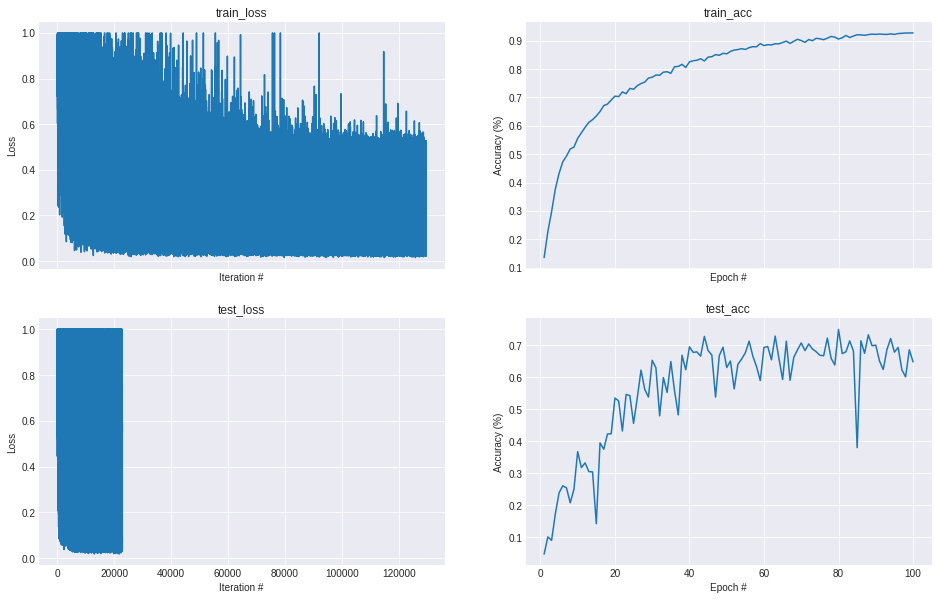

In [ ]:
plot_fit(fit_res)

# **Deep ResNet Model: Accuracy Plot**

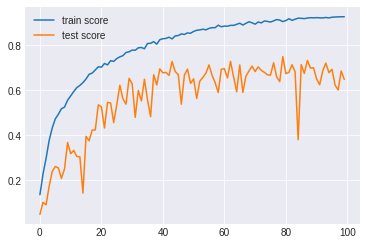

In [ ]:
import matplotlib.pyplot as plt
plt.plot(fit_res.train_acc)
plt.plot(fit_res.test_acc)
plt.legend(['train score', 'test score'])
plt.show()

In [ ]:
torch.cuda.empty_cache()

In [ ]:
import pickle

class Foo(object):
    def __init__(self, name):
        self.name = name

def main():
    foo = Foo('a')
    with open('/content/drive/My Drive/Project/data2/DeepResUNetV2.pkl', 'wb') as f:
        pickle.dump([foo], f, -1)

if __name__=='__main__':
    main()

In [ ]:




if __name__=='__main__':
    with open('/content/drive/My Drive/Project/data2/DeepResUNetV2.pkl', 'rb') as f:
        users = pickle.load(f)

In [ ]:
#  training parameters

torch.manual_seed(0)
num_epochs = 100
batch_size = 2
learning_rate = 0.001
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

# **ResUNet Model: Fitting**

In [ ]:
#Training 

# ResUNet segmentation for all types of cancer

#Measure the training time
%%time 
#Make a folder to save weights
weights_dir = "weights"
if os.path.exists(weights_dir) == False:
    os.mkdir(weights_dir)


model = ResUNet()
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)
criterion = dice_loss
success_metric = dice_coeff
trainer = Trainer(model, criterion, optimizer, dice_coeff, device, None)
fit_res = trainer.fit(dl_train, 
                      dl_test,
                      num_epochs= num_epochs,
                      checkpoints='/content/drive/My Drive/Project/data2/' + model.__class__.__name__ + "V2")
torch.save({'state_dict': model.state_dict()},
                   os.path.join(weights_dir, f"{val_dice:0.5f}_.pth"))

--- EPOCH 1/100 ---
train_batch (Avg. Loss 0.866, Min 0.345, Max 1.000), (Avg. Score 0.1393, Min 0.0000, Max 0.7070): 100%|██████████| 1296/1296 [20:17<00:00,  1.06it/s]
test_batch (Avg. Loss 0.908, Min 0.299, Max 1.000), (Avg. Score 0.0933, Min 0.0000, Max 0.7089): 100%|██████████| 229/229 [02:34<00:00,  1.48it/s]
--- EPOCH 2/100 ---
train_batch (Avg. Loss 0.717, Min 0.065, Max 1.000), (Avg. Score 0.2845, Min 0.0000, Max 0.9361): 100%|██████████| 1296/1296 [07:25<00:00,  2.91it/s]
test_batch (Avg. Loss 0.811, Min 0.102, Max 1.000), (Avg. Score 0.1895, Min 0.0000, Max 0.8986): 100%|██████████| 229/229 [00:29<00:00,  7.72it/s]
**** Checkpoint saved ****
--- EPOCH 3/100 ---
train_batch (Avg. Loss 0.610, Min 0.073, Max 1.000), (Avg. Score 0.3903, Min 0.0000, Max 0.9272): 100%|██████████| 1296/1296 [07:24<00:00,  2.91it/s]
test_batch (Avg. Loss 0.883, Min 0.120, Max 1.000), (Avg. Score 0.1173, Min 0.0000, Max 0.8830): 100%|██████████| 229/229 [00:29<00:00,  7.73it/s]
--- EPOCH 4/100 ---
tr

NameError: ignored

# **ResUNet Model: Save Model**

In [ ]:
torch.save(fit_res, '/content/drive/My Drive/Project/data2/ResUNET_model_v2')


# **ResUNet Model: Dice Score**

In [ ]:
print("Best dice score: %.2f" % fit_res.best_score)

Best dice score: 0.76


# **ResUNet Model: Loss and Accuracy Plot**

(<Figure size 1152x720 with 4 Axes>,
 array([<matplotlib.axes._subplots.AxesSubplot object at 0x7fe3d0084ed0>,
       dtype=object))

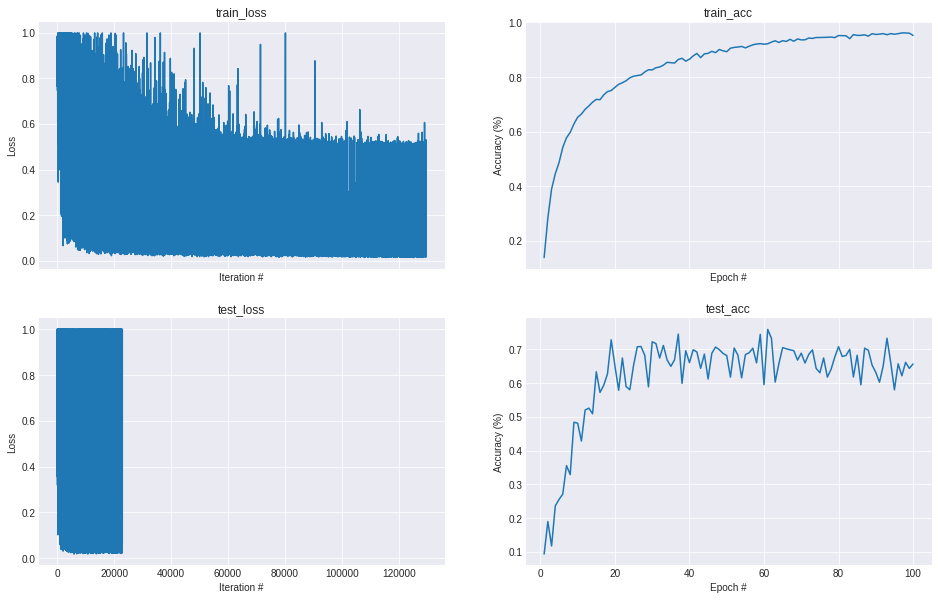

In [ ]:
plot_fit(fit_res)

# **ResUNet Model: Accuracy Plot**

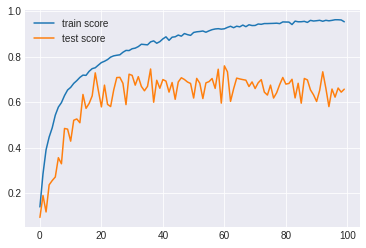

In [ ]:
import matplotlib.pyplot as plt
plt.plot(fit_res.train_acc)
plt.plot(fit_res.test_acc)
plt.legend(['train score', 'test score'])
plt.show()

In [ ]:
torch.manual_seed(0)

num_epochs = 100
batch_size = 2
learning_rate = 0.001
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

In [ ]:
# Data preparation
# load the data see data_preprocessing notebook for more explanation

def normalize(x,  mean=470, std=None):
    mean_tansor = torch.ones_like(x) * mean
    x -= mean_tansor
    if std:
        x /= std
    return x

def preprocessing(image, mask, bounding_box):
    mask_transformer = transforms.Compose([
        transforms.ToTensor()    
    ])
    mask_tensor = mask_transformer(mask).float()
    bounding_box_tensor = torch.zeros_like(mask_tensor).squeeze()
    bounding_box_tensor[bounding_box[0]:bounding_box[1],
                      bounding_box[2]:bounding_box[3]] = 1
    bounding_box_tensor = bounding_box_tensor.unsqueeze(0)
    image_transformer = transforms.Compose([
        transforms.ToTensor(),
        transforms.Lambda(lambda x: normalize(x))
    ])
    return (image_transformer(image).float(), bounding_box_tensor), mask_tensor

target_folder = '/content/drive/My Drive/Project/data2/'
ds_train = BrainTumorDatasetMaskAndBoundingBox(root=target_folder, train=True, transform=preprocessing)
ds_test = BrainTumorDatasetMaskAndBoundingBox(root=target_folder, train=False, transform=preprocessing)
dl_train = torch.utils.data.DataLoader(ds_train, batch_size, shuffle=True)
dl_test = torch.utils.data.DataLoader(ds_test, batch_size, shuffle=False)

Data directory already exists.  if from some reason the data directory structure is wrong please remove the data dir and rerun this script
Data directory already exists.  if from some reason the data directory structure is wrong please remove the data dir and rerun this script


# **ONet Model: Fitting**

In [ ]:
# Training and evaluation
model = ONet()
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)
criterion = dice_loss
success_metric = dice_coeff
trainer = Trainer(model, criterion, optimizer, dice_coeff, device, None)
fit_res_ONet = trainer.fit(dl_train, 
                      dl_test,
                      num_epochs= num_epochs,
                      checkpoints='/content/drive/My Drive/Project/data2/' + model.__class__.__name__)

--- EPOCH 1/100 ---
train_batch (Avg. Loss 0.830, Min 0.251, Max 1.000), (Avg. Score 0.1783, Min 0.0000, Max 0.7550): 100%|██████████| 1296/1296 [15:32<00:00,  1.39it/s]
test_batch (Avg. Loss 0.876, Min 0.304, Max 1.000), (Avg. Score 0.1337, Min 0.0000, Max 0.7906): 100%|██████████| 229/229 [01:55<00:00,  1.98it/s]
--- EPOCH 2/100 ---
train_batch (Avg. Loss 0.719, Min 0.180, Max 1.000), (Avg. Score 0.2840, Min 0.0000, Max 0.8209): 100%|██████████| 1296/1296 [07:43<00:00,  2.79it/s]
test_batch (Avg. Loss 0.847, Min 0.245, Max 1.000), (Avg. Score 0.1604, Min 0.0000, Max 0.8381): 100%|██████████| 229/229 [00:32<00:00,  6.99it/s]
**** Checkpoint saved ****
--- EPOCH 3/100 ---
train_batch (Avg. Loss 0.670, Min 0.136, Max 1.000), (Avg. Score 0.3311, Min 0.0000, Max 0.8650): 100%|██████████| 1296/1296 [07:43<00:00,  2.80it/s]
test_batch (Avg. Loss 0.838, Min 0.182, Max 1.000), (Avg. Score 0.1668, Min 0.0000, Max 0.8622): 100%|██████████| 229/229 [00:32<00:00,  7.00it/s]
**** Checkpoint saved 

# **ONet Model: Save Model**

In [ ]:
torch.save(fit_res_ONet, '/content/drive/My Drive/Project/data2/ONet_model_v2.pt')

# **ONet Model: Dice Score**

In [ ]:
print("Best dice score: %.2f" % fit_res_ONet.best_score)

Best dice score: 0.80


# **ONet Model: Loss and Accuracy Plot**

(<Figure size 1152x720 with 4 Axes>,
 array([<matplotlib.axes._subplots.AxesSubplot object at 0x7fd99b878650>,
       dtype=object))

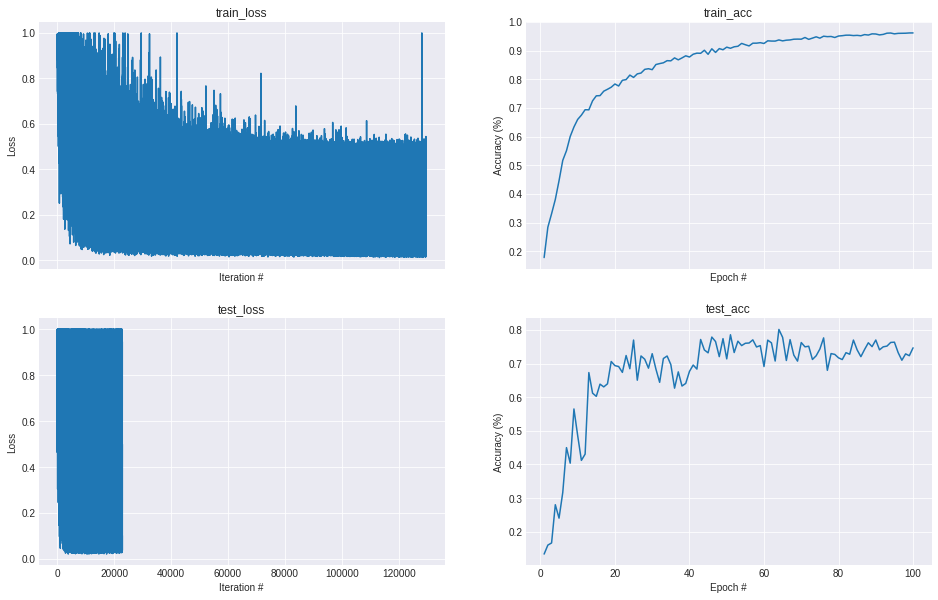

In [ ]:
plot_fit(fit_res_ONet)

# **ONet Model: Accuracy Plot**

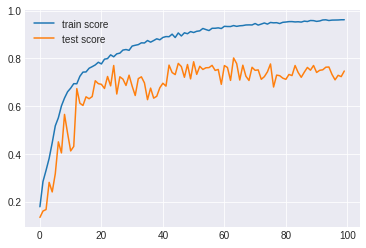

In [ ]:
import matplotlib.pyplot as plt
plt.plot(fit_res_ONet.train_acc)
plt.plot(fit_res_ONet.test_acc)
plt.legend(['train score', 'test score'])
plt.show()

In [ ]:
torch.manual_seed(0)
num_epochs = 100
batch_size = 6
learning_rate = 0.001
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

In [ ]:
# Data preparation
# load the data see data_preprocessing notebook for more explanation

def normalize(x,  mean=470, std=None):
    mean_tansor = torch.ones_like(x) * mean
    x -= mean_tansor
    if std:
        x /= std
    return x

def preprocessing(image, mask):
    mask_transformer = transforms.Compose([
        transforms.ToTensor()    
    ])

    image_transformer = transforms.Compose([
        transforms.ToTensor(),
        transforms.Lambda(lambda x: normalize(x))
    ])
    return image_transformer(image).float(), mask_transformer(mask).float()

target_folder = '/content/drive/My Drive/Project/data2/'
ds_train = BrainTumorDatasetMask(root=target_folder, train=True, transform=preprocessing)
ds_test = BrainTumorDatasetMask(root=target_folder, train=False, transform=preprocessing)
dl_train = torch.utils.data.DataLoader(ds_train, batch_size, shuffle=True)
dl_test = torch.utils.data.DataLoader(ds_test, batch_size, shuffle=False)

Data directory already exists.  if from some reason the data directory structure is wrong please remove the data dir and rerun this script
Data directory already exists.  if from some reason the data directory structure is wrong please remove the data dir and rerun this script


# **UNet Model: Fitting**

In [ ]:
# Training and evaluation
model = UNet()
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)
criterion = dice_loss
success_metric = dice_coeff
trainer = Trainer(model, criterion, optimizer, dice_coeff, device, None)
fit_res = trainer.fit(dl_train, 
                      dl_test,
                      num_epochs= num_epochs,
                      checkpoints='/content/drive/My Drive/Project/data2/' + model.__class__.__name__)

--- EPOCH 1/100 ---
train_batch (Avg. Loss 0.876, Min 0.459, Max 1.000), (Avg. Score 0.1261, Min 0.0000, Max 0.5489): 100%|██████████| 1296/1296 [25:02<00:00,  1.16s/it]
test_batch (Avg. Loss 0.974, Min 0.852, Max 1.000), (Avg. Score 0.0260, Min 0.0000, Max 0.1478): 100%|██████████| 229/229 [04:06<00:00,  1.08s/it]
--- EPOCH 2/100 ---
train_batch (Avg. Loss 0.819, Min 0.107, Max 1.000), (Avg. Score 0.1819, Min 0.0000, Max 0.8960): 100%|██████████| 1296/1296 [04:22<00:00,  4.93it/s]
test_batch (Avg. Loss 0.929, Min 0.099, Max 1.000), (Avg. Score 0.0702, Min 0.0000, Max 0.9071): 100%|██████████| 229/229 [00:19<00:00, 11.52it/s]
**** Checkpoint saved ****
--- EPOCH 3/100 ---
train_batch (Avg. Loss 0.746, Min 0.041, Max 1.000), (Avg. Score 0.2552, Min 0.0000, Max 0.9630): 100%|██████████| 1296/1296 [04:23<00:00,  4.92it/s]
test_batch (Avg. Loss 0.876, Min 0.114, Max 1.000), (Avg. Score 0.1246, Min 0.0000, Max 0.8865): 100%|██████████| 229/229 [00:19<00:00, 11.59it/s]
**** Checkpoint saved 

# **UNet Model: Save Model**

In [ ]:
torch.save(fit_res,'/content/drive/My Drive/Project/data2/UNET_model_v2.pt')

# **UNet Model: Dice Score**

In [ ]:
print("Best dice score: %.2f" % fit_res.best_score)

Best dice score: 0.75


# **UNet Model: Loss and Accuracy Plot**

(<Figure size 1152x720 with 4 Axes>,
 array([<matplotlib.axes._subplots.AxesSubplot object at 0x7f1850b7f890>,
       dtype=object))

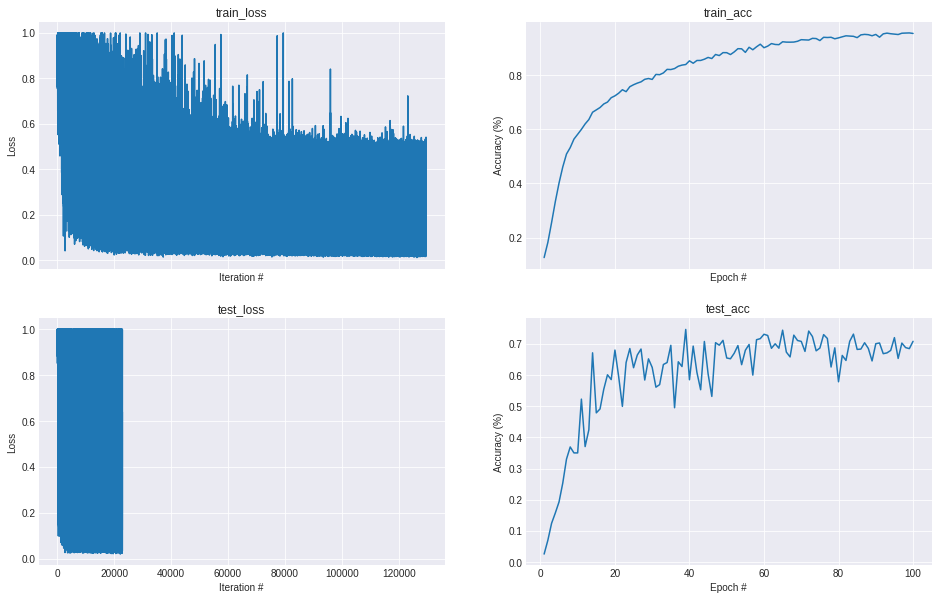

In [ ]:
plot_fit(fit_res)

# **UNet Model: Accuracy Plot**

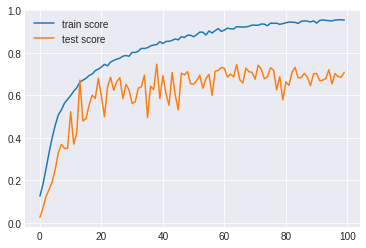

In [ ]:
import matplotlib.pyplot as plt
plt.plot(fit_res.train_acc)
plt.plot(fit_res.test_acc)
plt.legend(['train score', 'test score'])
plt.show()

In [ ]:
model = torch.load('/content/drive/My Drive/Project/data2/ONet_model_v2.pt')

In [ ]:
model = torch.load('/content/drive/My Drive/Project/data2/ONet')

# **Dynamic UNet Model**

A simpler version of UNet model 

# **Dynamic UNet: Configuration**

In [ ]:
# We would like to perform a train-validation-test split at the ratio of T:V:T = 6:2:2.
VAL_SPLIT = 0.2
TEST_SPLIT = 0.2
# Batch size for training. Limited by GPU memory
BATCH_SIZE = 2
# Dataset folder used
DATASET_USED = 'png_dataset'
# Full Dataset path
DATASET_PATH = os.path.join('drive/My Drive/Project/dataset',DATASET_USED)
# Training Epochs
epochs = 100
# Filters used in UNet Model
FILTER_LIST = [16,32,64,128,256]
# Flag to train the model
TRAIN = False
# Flag to load saved model
LOAD_MODEL = True
# Flag to save model trained
SAVE_MODEL = False
# Model name to save or load.
MODEL_NAME = f"Dynamic_UNet-{FILTER_LIST}.pt"

print(f"Model Name :   {MODEL_NAME}")

device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

Model Name :   Dynamic_UNet-[16, 32, 64, 128, 256].pt


In [ ]:
Dynamic_unet_model = None
Dynamic_unet_classifier = None
criterion = nn.BCELoss()
learning_rate = 0.0001

#### If you want to see the training trend within each epoch, you can change mini_batch to a positive integer 
#### that is no larger than the number of batches per epoch.
mini_batch = False

# Define where to save the model parameters.
model_save_path = 'drive/My Drive/Project/dataset'
os.makedirs(model_save_path, exist_ok = True)

# New model is created.
Dynamic_unet_model = Dynamic_UNet().to(device)



# **Dynamic YNet Model: Load, transform,  and split data**

In [ ]:
tumor_dataset = TumorDataset(DATASET_PATH)

train_indices, validation_indices, test_indices = get_indices(len(tumor_dataset), val_split = VAL_SPLIT, test_split = TEST_SPLIT)
train_sampler, validation_sampler, test_sampler = SubsetRandomSampler(train_indices), SubsetRandomSampler(validation_indices), SubsetRandomSampler(test_indices)

trainloader = torch.utils.data.DataLoader(tumor_dataset, BATCH_SIZE, sampler = train_sampler)
validationloader = torch.utils.data.DataLoader(tumor_dataset, 1, sampler = validation_sampler)
testloader = torch.utils.data.DataLoader(tumor_dataset, 1, sampler = test_sampler)



# **Dynamic UNet Model: Fitting**

In [ ]:
# Training session history data.
history = {'train_loss': list(), 'validation_loss': list()}

# For save best feature. Initial loss taken a very high value.
last_score = 0

# Optimizer used for training process. Adam Optimizer.
optimizer = optim.Adam(Dynamic_unet_model.parameters(), lr = learning_rate)

# Reducing LR on plateau feature to improve training.
scheduler = optim.lr_scheduler.ReduceLROnPlateau(optimizer, factor = 0.85, patience = 2, verbose = True)

print('Starting Training Process')

assert validationloader.batch_size == 1

# Epoch Loop
for epoch in range(epochs):
    
    #################################### Train ####################################################
    Dynamic_unet_model.train()
    start_time = time()
    # Training a single epoch
    train_epoch_loss, train_batch_loss, batch_iteration = 0, 0, 0
    validation_score, validation_loss = 0, 0

    for batch, data in enumerate(trainloader):
        # Keeping track how many iteration is happening.
        batch_iteration += 1
        # Loading data to device used.
        image = data['image'].to(device)
        mask = data['mask'].to(device)
        # Clearing gradients of optimizer.
        optimizer.zero_grad()
        # Calculation predicted output using forward pass.
        output = Dynamic_unet_model(image)
        # Calculating the loss value.
        loss_value = criterion(output, mask)
        # Computing the gradients.
        loss_value.backward()
        # Optimizing the network parameters.
        optimizer.step()
        # Updating the running training loss
        train_epoch_loss += loss_value.item()
        train_batch_loss += loss_value.item()

        # Printing batch logs if any. Useful if you want to see the training trends within each epoch.
        if mini_batch:
            if (batch + 1) % mini_batch == 0:
                train_batch_loss = train_batch_loss / (mini_batch * trainloader.batch_size)
                print(
                    f'    Batch: {batch + 1:2d},\tBatch Loss: {train_batch_loss:.7f}')
                train_batch_loss = 0

    train_epoch_loss = train_epoch_loss / (batch_iteration * trainloader.batch_size)
    
    ################################### Validation ##################################################
    Dynamic_unet_model.eval()
    # To get data in loops.
    batch_iteration = 0

    for batch, data in enumerate(validationloader):
        # Keeping track how many iteration is happening.
        batch_iteration += 1
        # Data prepared to be given as input to model.
        image = data['image'].to(device)
        mask = data['mask'].to(device)

        # Predicted output from the input sample.
        mask_prediction =Dynamic_unet_model(image)
        
        # comput validation loss
        loss_value = criterion(mask_prediction, mask)
        validation_loss += loss_value.item()
        
        # Threshold elimination.
        mask_prediction = (mask_prediction > 0.5)
        mask_prediction = mask_prediction.cpu().numpy()
        mask = mask.cpu().numpy()

        mask = np.resize(mask, (1, 512, 512))
        mask_prediction = np.resize(mask_prediction, (1, 512, 512))
        # Calculate the dice score for original and predicted image mask.
        validation_score += dice_coefficient(mask_prediction, mask)

    # Calculating the mean score for the whole validation dataset.
    unet_val = validation_score / batch_iteration
    validation_loss = validation_loss / batch_iteration
    
    # Collecting all epoch loss values for future visualization.
    history['train_loss'].append(train_epoch_loss)
    history['validation_loss'].append(validation_loss)
    
    # Reduce LR On Plateau
    scheduler.step(validation_loss)

    time_taken = time() - start_time
    
    # Training Logs printed.
    print(f'Epoch: {epoch + 1:3d},  ', end = '')
    print(f'train Loss: {train_epoch_loss:.5f},  ', end = '')
    print(f'validation Loss: {validation_loss:.5f},  ', end = '')
    print(f'validation score: {unet_val:.5f},  ', end = '')

    for pg in optimizer.param_groups:
        print('current lr: ', pg['lr'], ', ', end = '')
    print(f'Time: {time_taken:.2f} s', end = '')

    # Save the model every epoch.
    current_epoch_model_save_path = os.path.join(model_save_path, 'Basic_Unet_epoch_%s.pth' % (str(epoch).zfill(3)))
    torch.save(Dynamic_unet_model.state_dict(), current_epoch_model_save_path)
    
    # Save the best model (determined by validation score) and give it a unique name.
    best_model_path = os.path.join(model_save_path, 'Basic_Unet_best_model.pth')
    if  last_score < unet_val:
        torch.save(Dynamic_unet_model.state_dict(), best_model_path)
        last_score = unet_val
        print(f'\tBest model saved at score: {unet_val:.5f}')
    else:
        print()

print(f'Training Finished after {epochs} epoches')

Starting Training Process
Epoch:   1,  train Loss: 0.03004,  validation Loss: 0.06067,  validation score: 0.00046,  current lr:  0.0001 , Time: 327.18 s	Best model saved at score: 0.00046
Epoch:   2,  train Loss: 0.02887,  validation Loss: 0.06071,  validation score: 0.00046,  current lr:  0.0001 , Time: 43.52 s
Epoch:   3,  train Loss: 0.02795,  validation Loss: 0.05620,  validation score: 0.00046,  current lr:  0.0001 , Time: 43.53 s	Best model saved at score: 0.00046
Epoch:   4,  train Loss: 0.02768,  validation Loss: 0.05803,  validation score: 0.00046,  current lr:  0.0001 , Time: 43.30 s
Epoch:   5,  train Loss: 0.02680,  validation Loss: 0.05403,  validation score: 0.00463,  current lr:  0.0001 , Time: 43.43 s	Best model saved at score: 0.00463
Epoch:   6,  train Loss: 0.02640,  validation Loss: 0.05225,  validation score: 0.00445,  current lr:  0.0001 , Time: 43.34 s
Epoch:   7,  train Loss: 0.02668,  validation Loss: 0.05262,  validation score: 0.02031,  current lr:  0.0001 , 

# **Dynamic UNet Model: Save Model**

In [ ]:
torch.save(Dynamic_unet_model, '/content/drive/My Drive/Project/data2/DynamicUNET_model_v2.pth')

In [ ]:
torch.save(Dynamic_unet_model, '/content/drive/My Drive/Project/data2/DynamicUNET_model_v2')

# **Dynamic UNet Model: Loss Plot**

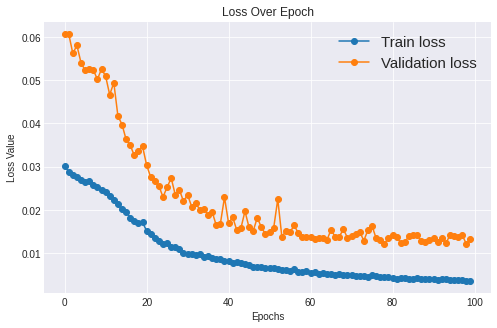

In [ ]:
plt.figure(figsize=(8, 5))
plt.title('Loss Over Epoch')
plt.xlabel('Epochs')
plt.ylabel('Loss Value')
train_curve = plt.plot(history['train_loss'], marker = 'o', label = 'Train loss')
validation_curve = plt.plot(history['validation_loss'], marker = 'o', label = 'Validation loss')
plt.legend(fontsize = 15)
plt.show()

# **Dynamic UNet Model: Dice score**

In [ ]:
# Load the unet model at its prime (when it performed the best on the validation set).
#state_dict = torch.load(os.path.join(model_save_path, 'Basic_Unet_best_model.pth'))
#Dynamic_unet_model.load_state_dict(state_dict)

# Testing process on test data.
Dynamic_unet_model.eval()
# Getting test data indices for dataloading
test_data_indexes = test_indices
# Total testing data used.
data_length = len(test_data_indexes)
# Score after testing on dataset.
mean_test_score = 0

for batch, data in enumerate(testloader):
    # Data prepared to be given as input to model.
    image = data['image'].to(device)
    mask = data['mask']

    # Predicted output from the input sample.
    mask_prediction = Dynamic_unet_model(image).cpu()
    # Threshold elimination.
    mask_prediction = (mask_prediction > 0.5)
    mask_prediction = mask_prediction.numpy()

    mask = np.resize(mask, (1, 512, 512))
    mask_prediction = np.resize(mask_prediction, (1, 512, 512))

    # Calculating the dice score for original and predicted mask.
    mean_test_score += dice_coefficient(mask_prediction, mask)

# Calculating the mean score for the whole test dataset.
Dynamic_unet_score = mean_test_score / data_length
# Putting the model back to training mode.
print(f'\nDice Score {Dynamic_unet_score}\n')


Dice Score 0.7982382634448346



# **Segmentation Visualization**

# **Segmentation Plot Function**

In [ ]:
def result(image, mask, output, title, transparency = 0.38, save_path = None):
    '''
    Plots a 2x3 plot with comparisons of output and original image.
    Works best with Jupyter Notebook/Lab.
    Parameters:
        image(numpy.ndarray): Array containing the original image of MRI scan.
        mask(numpy.ndarray): Array containing the original mask of tumor.
        output(numpy.ndarray): Model predicted mask from input image.
        title(str): Title of the plot to be used.
        transparency(float): Transparency level of mask on images.
                             Default: 0.38
        save_path(str): Saves the plot to the location specified.
                        Does nothing if None. 
                        Default: None
    Return:
        None
    '''

    fig, axs = plt.subplots(2, 3, sharex=True, sharey=True, figsize=(
        20, 15), gridspec_kw={'wspace': 0.025, 'hspace': 0.010})
    fig.suptitle(title, x=0.5, y=0.92, fontsize=20)

    axs[0][0].set_title("Original Mask", fontdict={'fontsize': 16})
    axs[0][0].imshow(mask, cmap='gray')
    axs[0][0].set_axis_off()

    axs[0][1].set_title("Predicted Mask", fontdict={'fontsize': 16})
    axs[0][1].imshow(output, cmap='gray')
    axs[0][1].set_axis_off()

    mask_diff = np.abs(np.subtract(mask, output))
    axs[0][2].set_title("Mask Difference", fontdict={'fontsize': 16})
    axs[0][2].imshow(mask_diff, cmap='gray')
    axs[0][2].set_axis_off()

    seg_output = mask*transparency
    seg_image = np.add(image, seg_output)/2
    axs[1][0].set_title("Original Segmentation", fontdict={'fontsize': 16})
    axs[1][0].imshow(seg_image, cmap='gray')
    axs[1][0].set_axis_off()

    seg_output = output*transparency
    seg_image = np.add(image, seg_output)/2
    axs[1][1].set_title("Predicted Segmentation", fontdict={'fontsize': 16})
    axs[1][1].imshow(seg_image, cmap='gray')
    axs[1][1].set_axis_off()

    axs[1][2].set_title("Original Input Image", fontdict={'fontsize': 16})
    axs[1][2].imshow(image, cmap='gray')
    axs[1][2].set_axis_off()

    plt.tight_layout()

    if save_path:
        plt.savefig(save_path, dpi = 90, bbox_inches = 'tight')

    plt.show()

# **Segementation application on Test Data**

Test on 10 random images of the test data

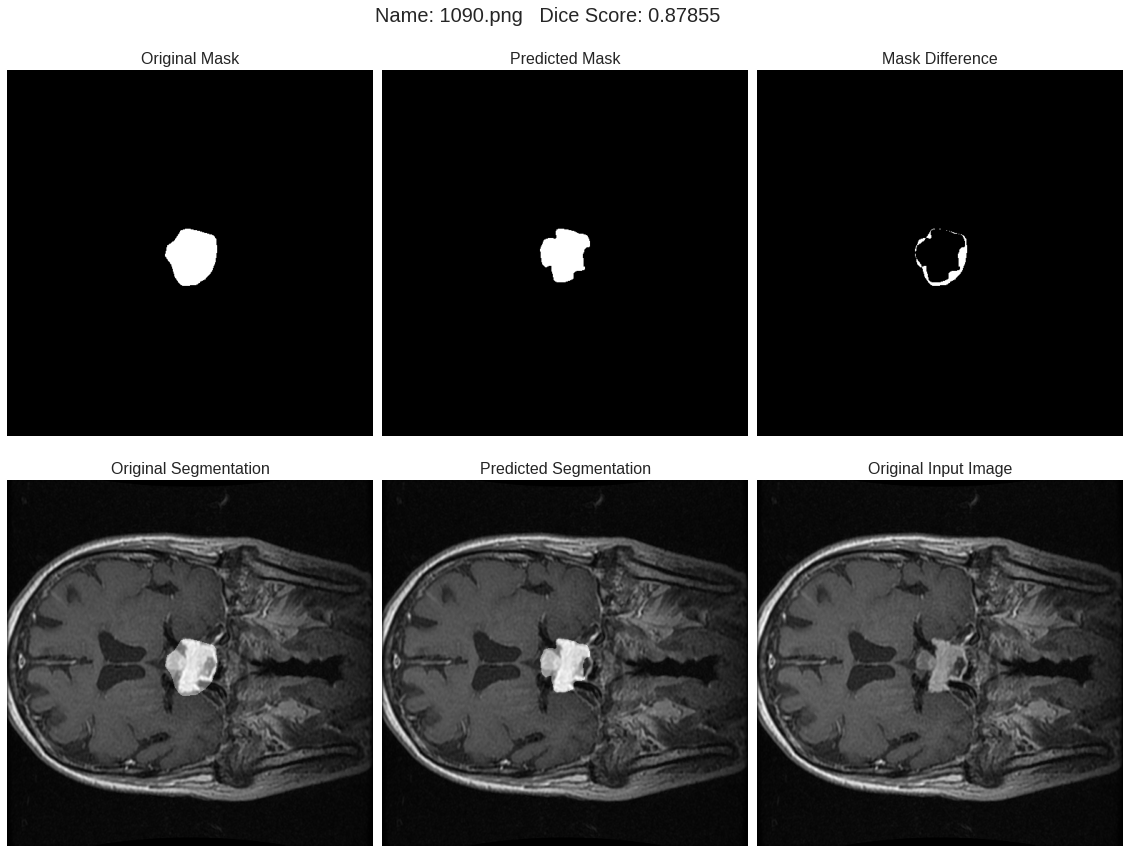

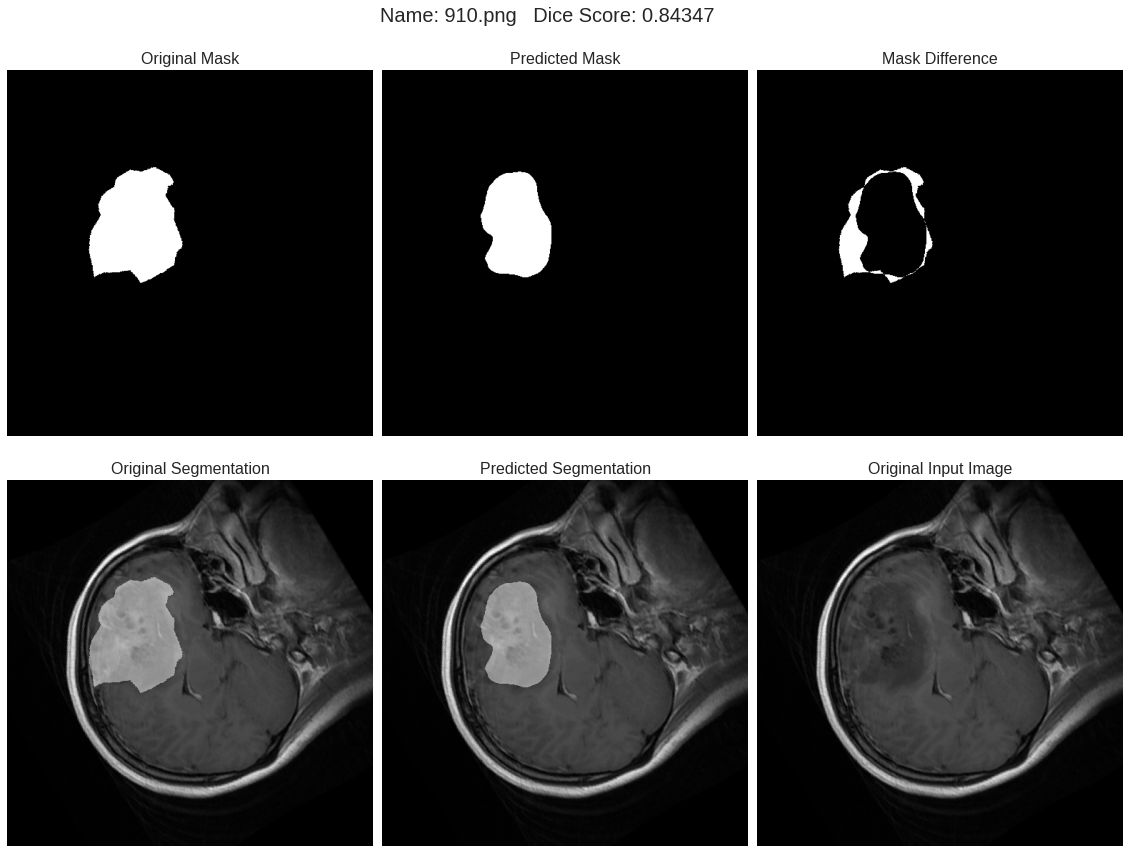

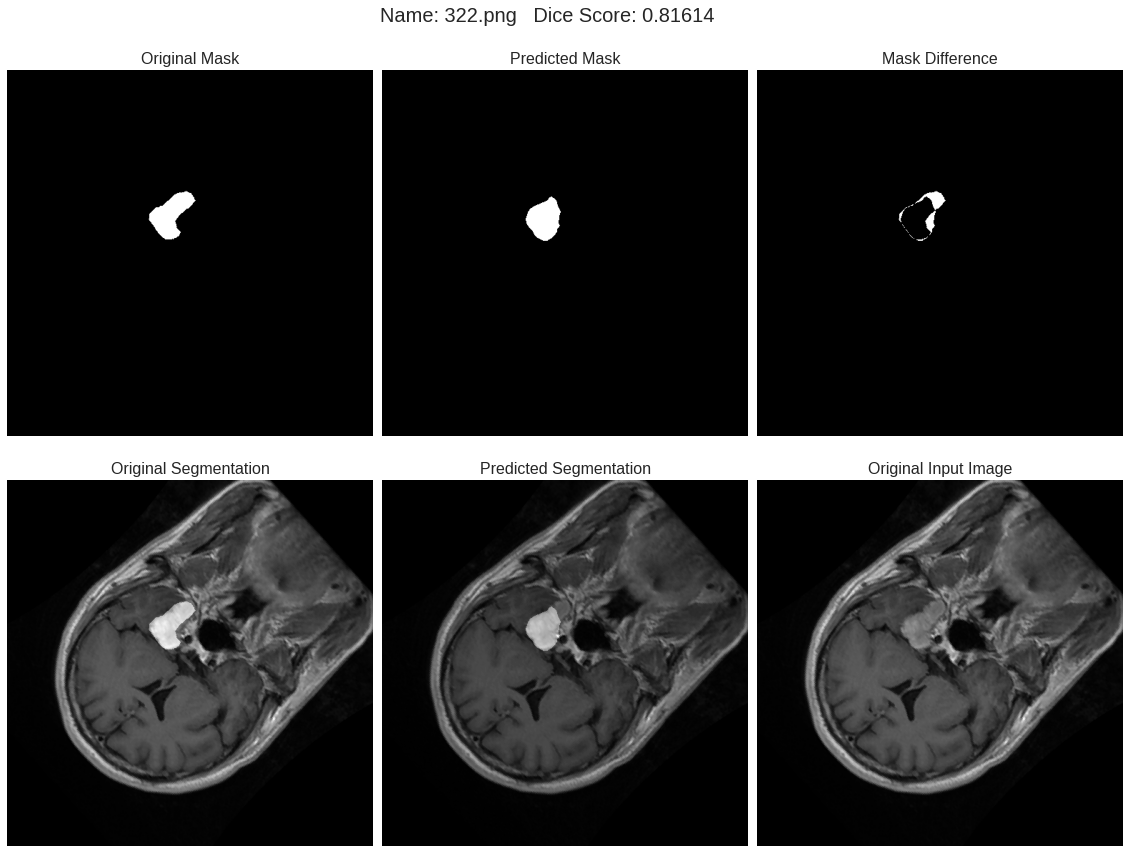

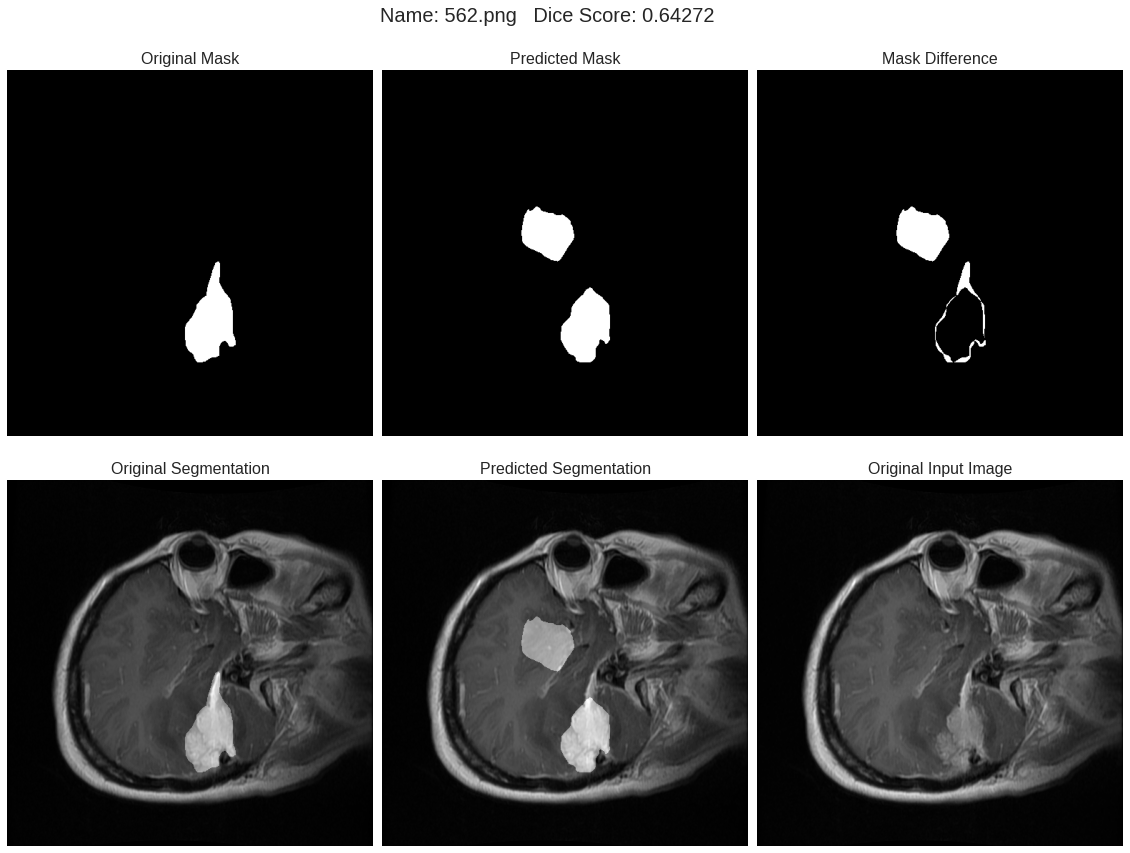

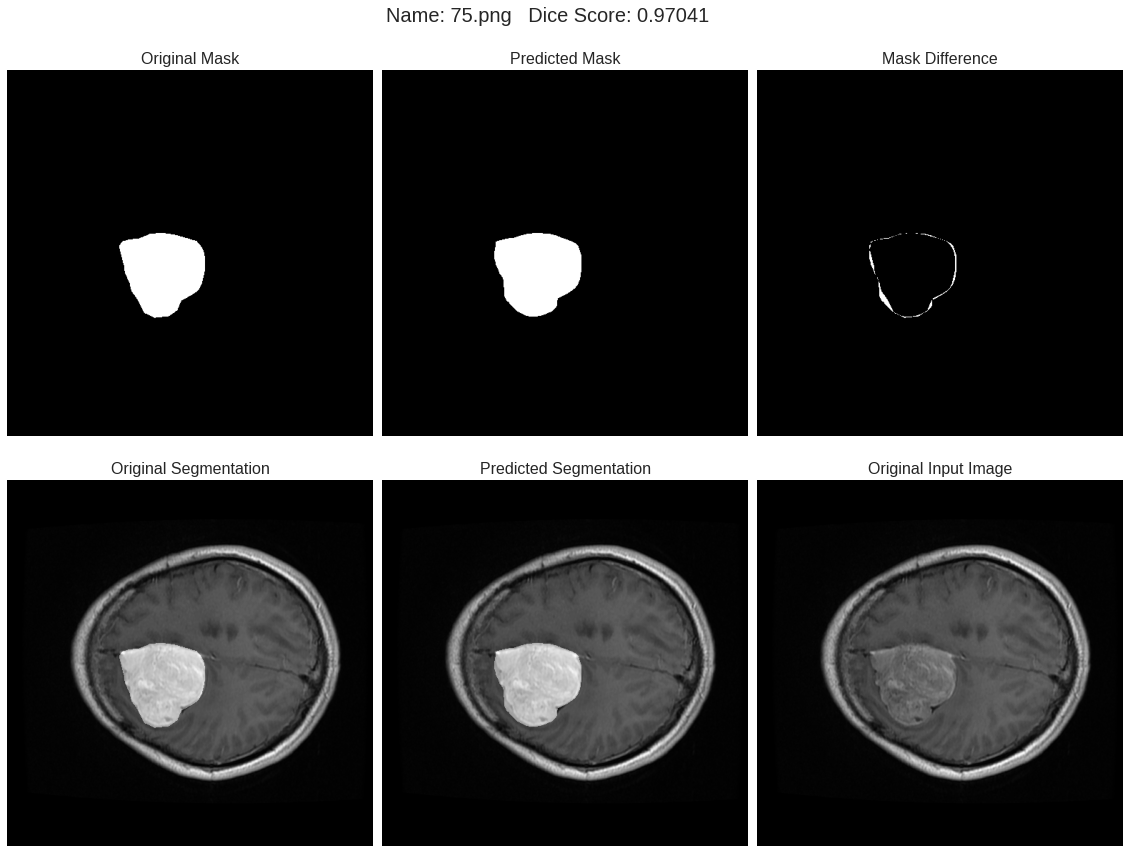

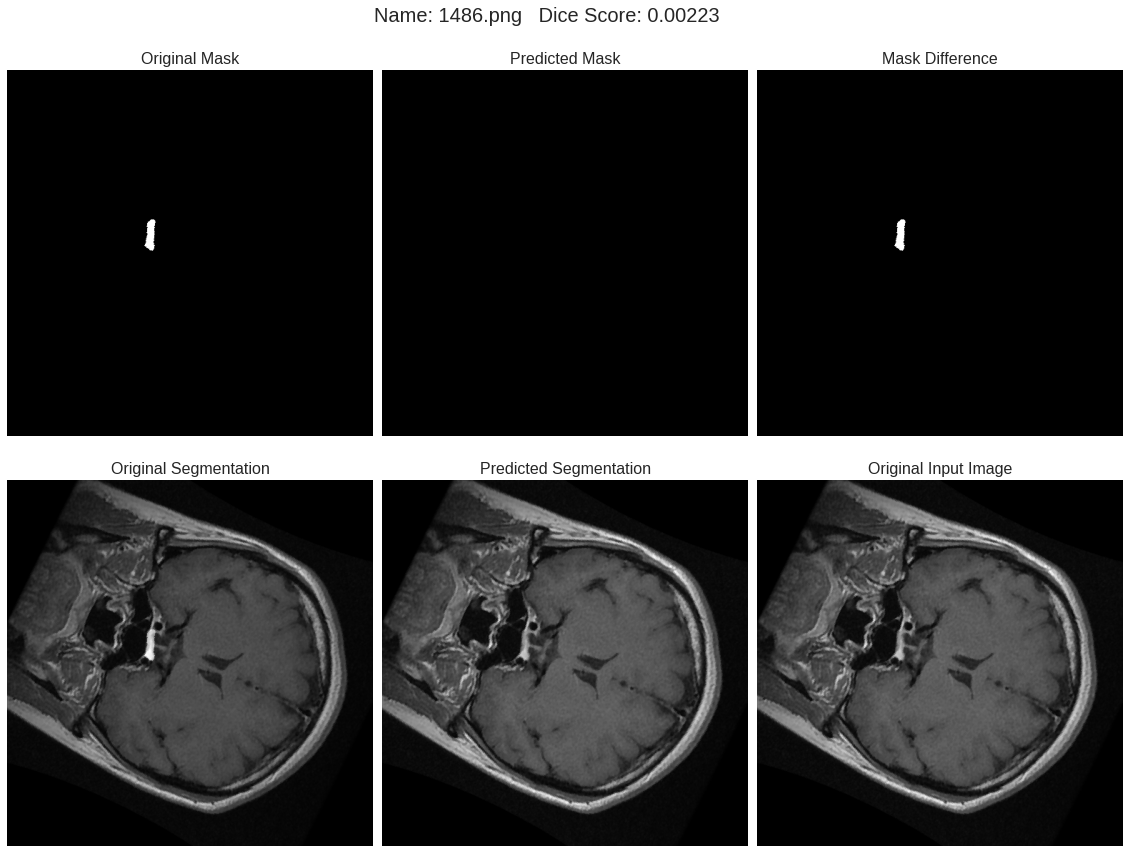

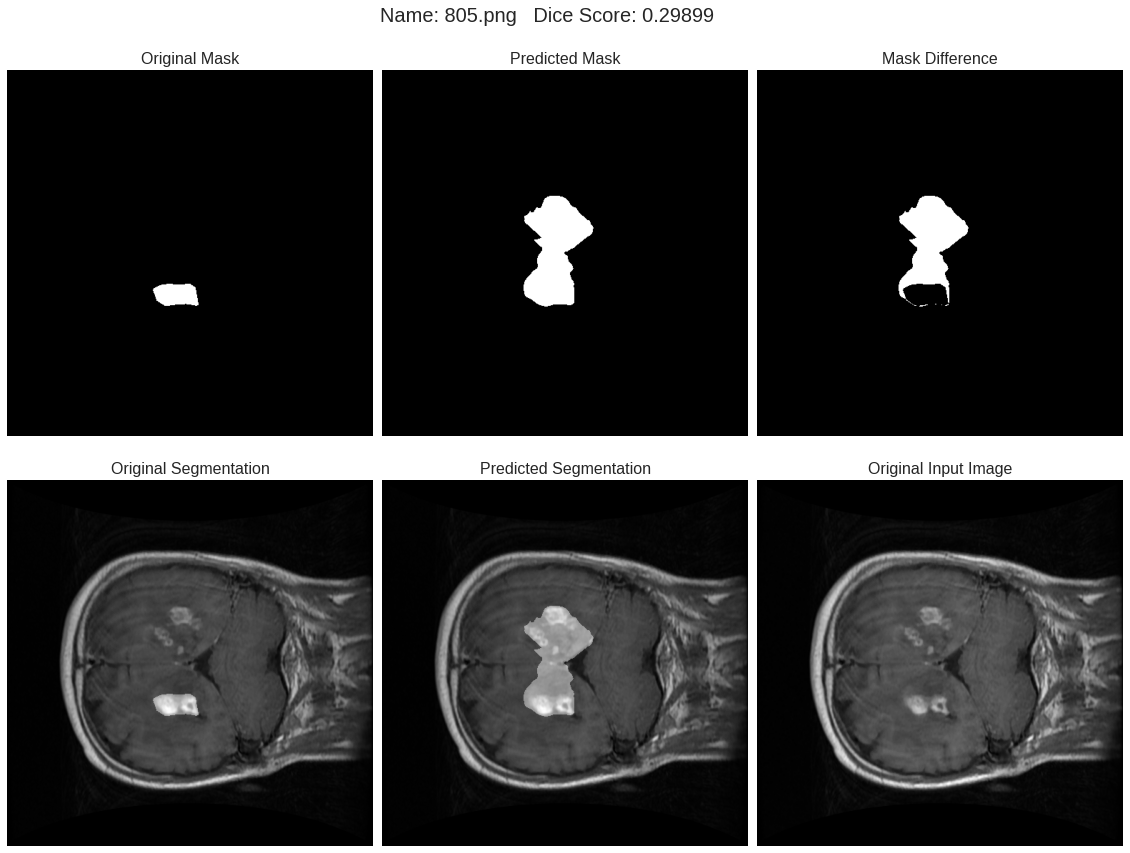

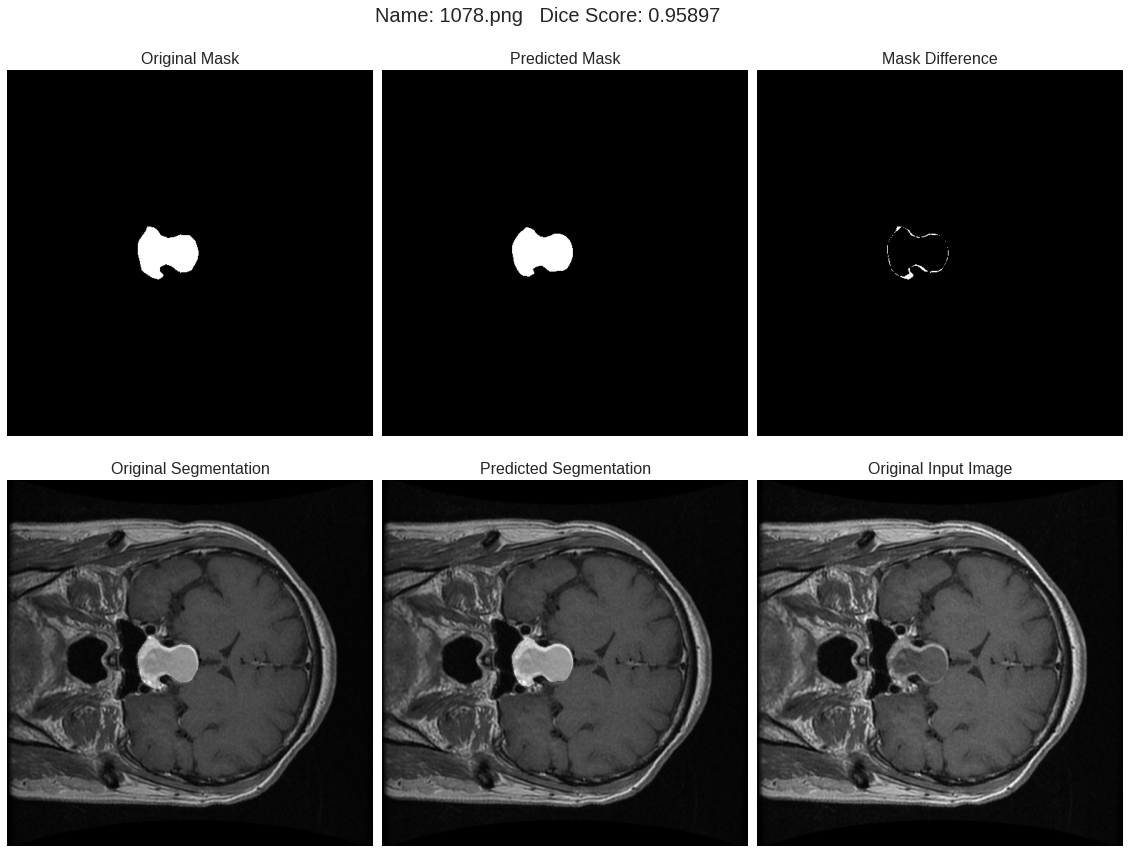

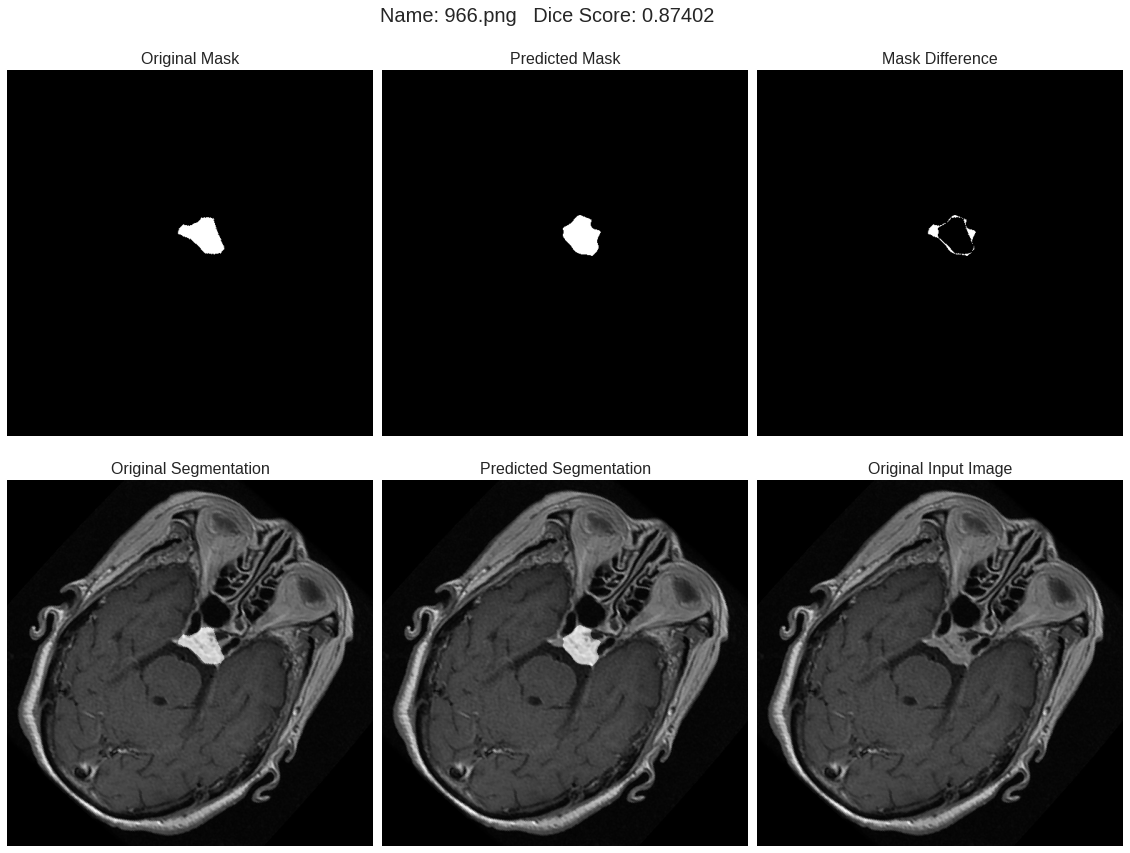

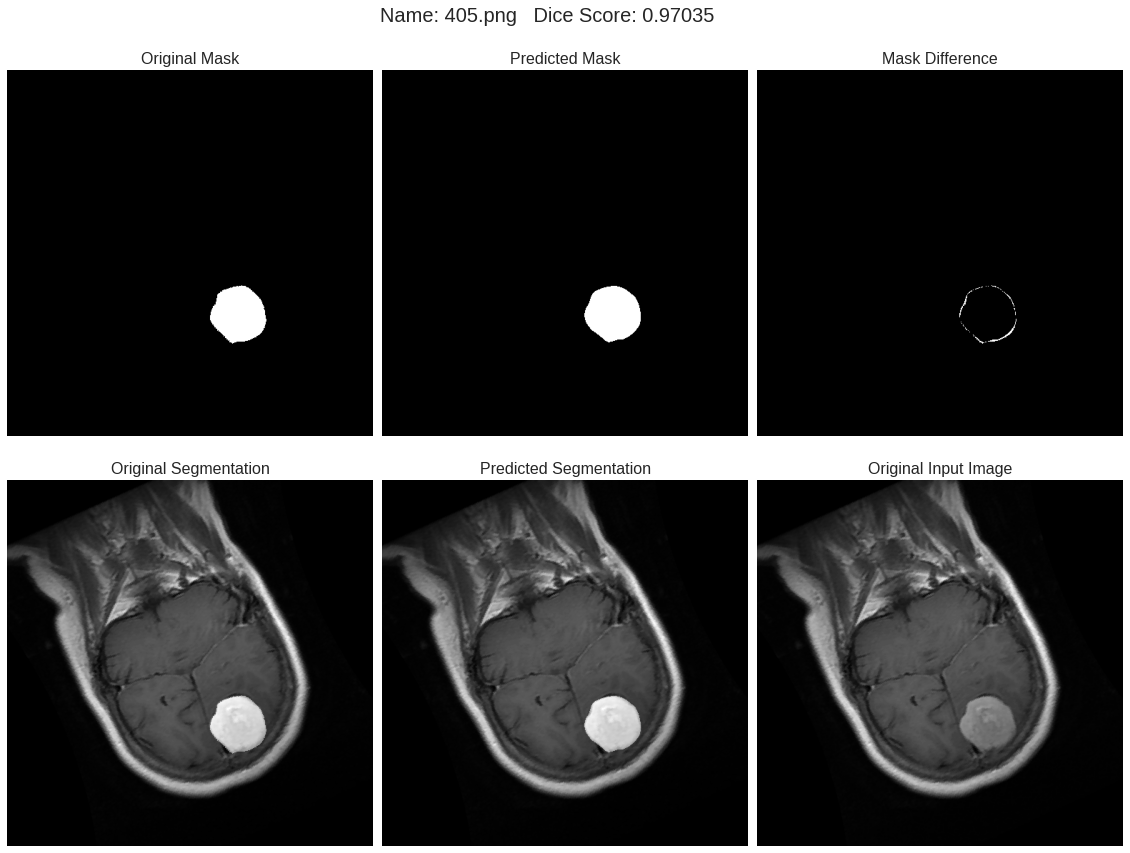

In [ ]:
for example_index in range(10):
    # The purpose of image_index is to make sure we truly pick from the test set.
    image_index = test_indices[example_index]
    sample = tumor_dataset[image_index]
    threshold = 0.5

    Dynamic_unet_model.eval()
    image = sample['image'].numpy()
    mask = sample['mask'].numpy()

    image_tensor = torch.Tensor(image)
    image_tensor = image_tensor.view((-1, 1, 512, 512)).to(device)
    output = Dynamic_unet_model(image_tensor).detach().cpu()
    output = (output > threshold)
    output = output.numpy()

    # image(numpy.ndarray): 512x512 Original brain scanned image.
    image = np.resize(image, (512, 512))
    # mask(numpy.ndarray): 512x512 Original mask of scanned image.
    mask = np.resize(mask, (512, 512))
    # output(numpy.ndarray): 512x512 Generated mask of scanned image.
    output = np.resize(output, (512, 512))
    # score(float): Sørensen–Dice Coefficient for mask and output. Calculates how similar are the two images.
    d_score = dice_coefficient(output, mask)

    title = f'Name: {image_index}.png   Dice Score: {d_score:.5f}'
    # save_path = os.path.join('images',f'{d_score:.5f}_{image_index}.png')
    result(image, mask, output, title, save_path = None)

# **Segementation application on Selected Test Data**

Test a single image of the test data

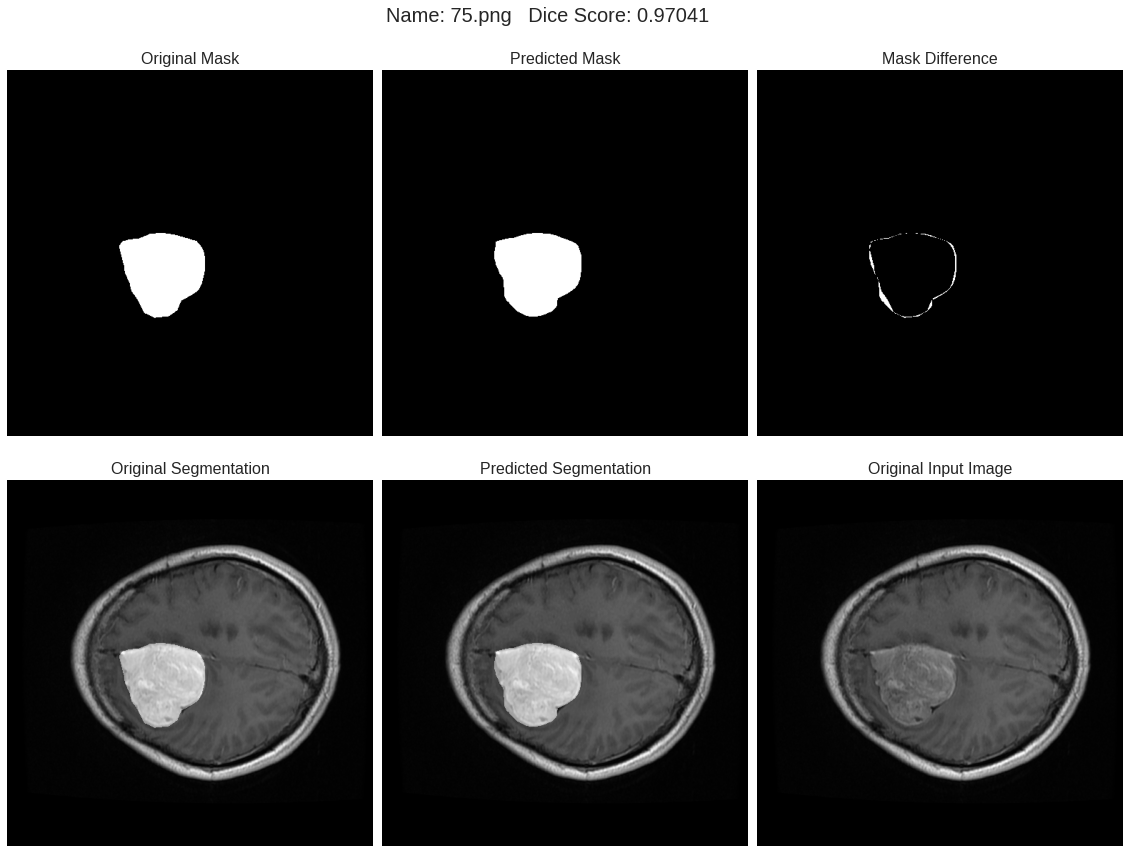

In [ ]:
i=4
# Run this cell repeatedly to see some results.
image_index = test_indices[i]
sample = tumor_dataset[image_index]
Dynamic_unet_model.eval()
image = sample['image'].numpy()
mask = sample['mask'].numpy()
image_tensor = torch.Tensor(image)
image_tensor = image_tensor.view((-1, 1, 512, 512)).to(device)
output = Dynamic_unet_model(image_tensor).detach().cpu()
output = (output > threshold)
output = output.numpy()

# image(numpy.ndarray): 512x512 Original brain scanned image.
image = np.resize(image, (512, 512))
# mask(numpy.ndarray): 512x512 Original mask of scanned image.
mask = np.resize(mask, (512, 512))
# output(numpy.ndarray): 512x512 Generated mask of scanned image.
output = np.resize(output, (512, 512))
# score(float): Sørensen–Dice Coefficient for mask and output. Calculates how similar are the two images.
d_score = dice_coefficient(output, mask)
title = f'Name: {image_index}.png   Dice Score: {d_score:.5f}'
# save_path = os.path.join('images',f'{d_score:.5f}_{image_index}.png')
result(image,mask,output,title,save_path=None)
i += 1
if i >= len(test_indices):
    i = 0

# **Business Value**

Automatic segmention machine learning models with dice coefficient of 0.8% (percentage of correct tumor pixels):

Automatic segmention machine learning models:

1) fast, accurate, automatic detection, and segmentation process.

2) Reliable.

3) Efficient treatment.

4) Precise traget of tumor cells for radiation treatment.

5) Reduce significantly the time of diagnosis.

6) Decrease the workload on healthworkers.

7) Decrease the number of healthworkers.

8) Prevent cancer spread and save lives




# **Recommendations**

1) Use deep learning CNN models for early detection and treatment of brain tumors.

2) Incorporate automatic identification of tumor models with MRI scan technology.

3) Incorporate automatic segemntation model into radiology treatment technology.

4) Incorporate segemntation maps for surgery operation or robotic surgery arms.

5) App made available for everyone to visualiza their MRI brain results.

# **Conclusion**

The ResUnet and Onet architecture gave the best dice score of 0.76, 0.80 respectively. 

ResUnet is better for this type of data than the basic Unet and Deep ResUnet. It converts fatser and generate less noisy test accuracy.

Onet was performing the best with 0.8 dice score. Adding bounding box with tumor area can boost model performance. This model depends on a good estimation of tumor region.

More complex models do not always improve the performance of the network like we see in Deep ResUnet.



# **Future Work**

Develop a segmentation model for diffrent stages of glioma

Improve the architect of CNN models to achieve a dice score greater than 0.8.

Apply diffrent models architecture on brain tumor dataset with optimization: 

e.g. Attention Unet, 3D ResUNet, Multi ResUNet, TransUNet, UNet 3+ , UNet++, PSPNet, DeepLab V3+.


# **References**

Md Zahangir Alom et al. “Recurrent Residual Convolutional Neural Network
based on U-Net (R2U-Net) for Medical Image Segmentation”. In: arXiv
(Feb. 2018). eprint: 1802.06955. url: https://arxiv.org/abs/1802.
06955.

Brain tumor dataset. [Online; accessed 27. Sep. 2019]. Apr. 2017. url:
https://figshare.com/articles/brain_tumor_dataset/1512427/5.

Kaiming He et al. “Identity Mappings in Deep Residual Networks”. In:
arXiv (Mar. 2016). eprint: 1603.05027. url: https://arxiv.org/abs/
1603.05027.

 Olaf Ronneberger, Philipp Fischer, and Thomas Brox. “U-Net: Convolutional
Networks for Biomedical Image Segmentation”. In: arXiv (May 2015).
eprint: 1505.04597. url: https://arxiv.org/abs/1505.04597.



Zhengxin Zhang, Qingjie Liu, and Yunhong Wang. “Road Extraction by
Deep Residual U-Net”. In: arXiv (Nov. 2017). doi: 10.1109/LGRS.2018.


Wang, C.; Li, C.; Liu, J.; Luo, B.; Su, X.; Wang, Y.; Gao, Y. U2-ONet: A Two-Level Nested Octave U-Structure Network with a Multi-Scale Attention Mechanism for Moving Object Segmentation. Remote Sens. 2021, 13, 60. https://doi.org/10.3390/rs13010060

F. Isenee et al, Brain Tumor Segmentation and Radiomics Survival Prediction: Contribution to the BRATS 2017 Challenege. Computer Vision and Pattern Recognition. arXiv: 1802.10508v1.
